# Importing Libraries

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

# Importing Dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Temperature%20Forecast/temperature.csv")

In [3]:
# printing first 5 rows of the dataset
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [4]:
# checking dimensions of the dataset
df.shape

(7752, 25)

In [5]:
# printing the columns of the dataset
df.columns.tolist()

['station',
 'Date',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'lat',
 'lon',
 'DEM',
 'Slope',
 'Solar radiation',
 'Next_Tmax',
 'Next_Tmin']

In [6]:
# checking for the missing values of the dataset
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

#### We Can drop the Missing Values.

In [7]:
df.dropna(inplace=True)

#### Now Let's check for the Missing Values!

In [8]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

Finally, No Missing Value is Present.

In [9]:
# checking datatypes of the dataset
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

There are 2 different (float64 & object) types of data. 

In [10]:
# checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Date              7588 non-null   object 
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null   float64
 17  

In [11]:
# Converting Date datatypes and spliting date into date, month and year.
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)

#### Now again checking datatypes of the dataset.

In [12]:
df.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
Day                          int64
Month                        int64
Year                         int64
dtype: object

Now Date is in datetime64 format.

In [13]:
df.describe()

station                           Date  Present_Tmax  Present_Tmin  \
count  7588.000000                           7588   7588.000000   7588.000000   
mean     13.014101  2015-07-27 18:22:12.208750592     29.748366     23.195809   
min       1.000000            2013-06-30 00:00:00     20.000000     11.300000   
25%       7.000000            2014-07-15 00:00:00     27.800000     21.600000   
50%      13.000000            2015-07-29 00:00:00     29.900000     23.400000   
75%      19.000000            2016-08-14 00:00:00     32.000000     24.800000   
max      25.000000            2017-08-30 00:00:00     37.600000     29.900000   
std       7.217858                            NaN      2.967401      2.400880   

       LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  \
count  7588.000000  7588.000000       7588.000000       7588.000000   
mean     56.724969    88.360823         29.620128         23.511786   
min      19.794666    58.936283         17.624954         14.272646   
25%      45.960243    84.203724         27.673756         22.086820   
50%      55.023199    89.784122         29.709537         23.758249   
75%      67.115099    93.742725         31.711109         25.155660   
max      98.524734   100.000153         38.542255         29.619342   
std      14.626559     7.199456          2.943496          2.342579   

          LDAPS_WS     LDAPS_LH  ...          lat         lon          DEM  \
count  7588.000000  7588.000000  ...  7588.000000  7588.00000  7588.000000   
mean      7.094097    62.492606  ...    37.544792   126.99142    61.918136   
min       2.882580   -13.603212  ...    37.456200   126.82600    12.370000   
25%       5.675358    37.206201  ...    37.510200   126.93700    28.700000   
50%       6.547838    56.898324  ...    37.550700   126.99500    45.716000   
75%       8.028960    84.235666  ...    37.577600   127.04200    59.832400   
max      21.857621   213.414006  ...    37.645000   127.13500   212.335000   
std       2.177034    33.686158  ...     0.050428     0.07922    54.323529   

             Slope  Solar radiation    Next_Tmax    Next_Tmin          Day  \
count  7588.000000      7588.000000  7588.000000  7588.000000  7588.000000   
mean      1.259755      5343.724208    30.241526    22.910820    15.939510   
min       0.098500      4329.520508    17.400000    11.300000     1.000000   
25%       0.271300      5001.485717    28.200000    21.300000     8.000000   
50%       0.618000      5441.987305    30.400000    23.100000    16.000000   
75%       1.767800      5729.485840    32.600000    24.600000    24.000000   
max       5.178200      5992.895996    38.900000    29.800000    31.000000   
std       1.372748       429.782561     3.111807     2.482256     8.906521   

             Month         Year  
count  7588.000000  7588.000000  
mean      7.465999  2014.991697  
min       6.000000  2013.000000  
25%       7.000000  2014.000000  
50%       7.000000  2015.000000  
75%       8.000000  2016.000000  
max       8.000000  2017.000000  
std       0.528635     1.410877  

[8 rows x 28 columns]

# Start Exploring Present Temperature

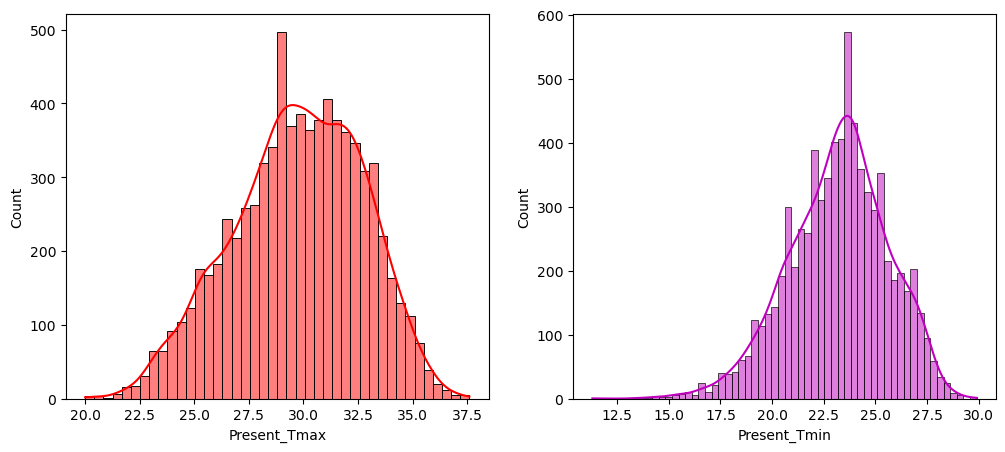

In [14]:
# Plotting histogram for present_Tmax and present_Tmin variables
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Present_Tmax'],kde=True,color='r')
plt.subplot(1,2,2)
sns.histplot(df['Present_Tmin'],kde=True,color='m')
plt.show()

For majority of reading Present Temperature Maximum varies in between 27.5 to 32.5 degree...
For majority of reading Present Temperature Minimum varies in between 22.5 to 26 degree.

# Lets find out maximum and minimum Temperature over period

In [15]:
print('Present Maximum Temperature Maxima in year 2013-2016 :',df.Present_Tmax.max())
print('Present Maximum Temperature Minima in year 2013-2016 :',df.Present_Tmax.min())
print(' Average Present Maximum Temperature in year 2013-2016 :',df.Present_Tmax.mean())
print('='*100)
print('Present Minimum Temperature Maxima in year 2013-2016 :',df.Present_Tmin.max())
print('Present Minimum Temperature Minima in year 2013-2016 :',df.Present_Tmin.min())
print('Average Present Minimum Temperature in year 2013-2016 :',df.Present_Tmin.mean())

Present Maximum Temperature Maxima in year 2013-2016 : 37.6
Present Maximum Temperature Minima in year 2013-2016 : 20.0
 Average Present Maximum Temperature in year 2013-2016 : 29.748365840801263
Present Minimum Temperature Maxima in year 2013-2016 : 29.9
Present Minimum Temperature Minima in year 2013-2016 : 11.3
Average Present Minimum Temperature in year 2013-2016 : 23.195809172377437


### Line Plot of Present Temperature Maximum over each Station

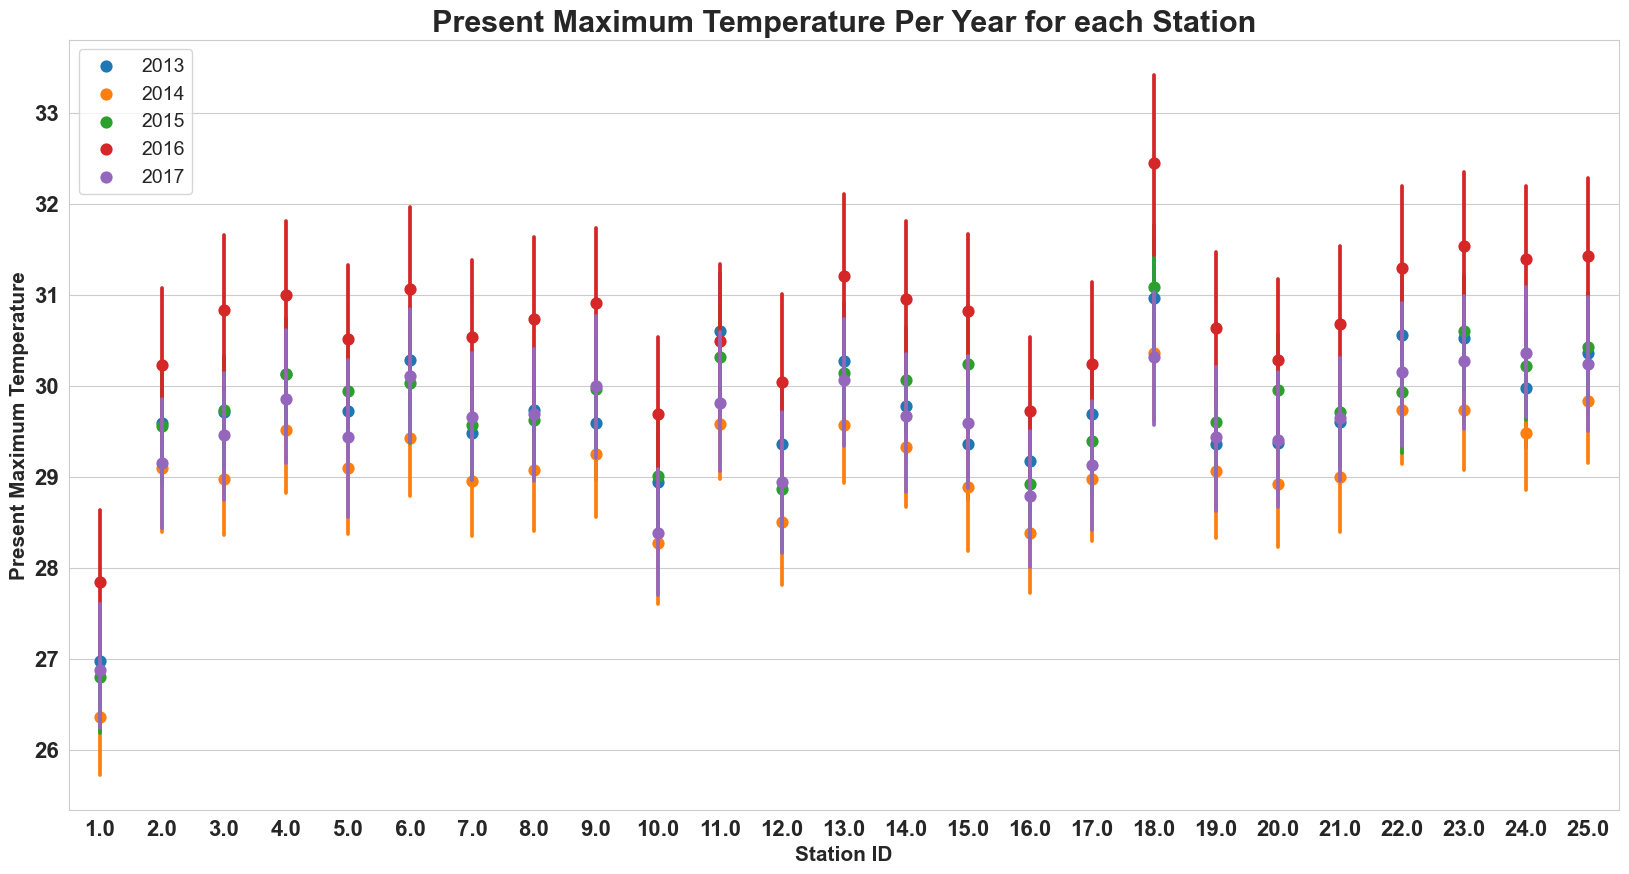

In [16]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.pointplot(x='station', y='Present_Tmax', data=df, hue='Year',join=False)
plt.title('Present Maximum Temperature Per Year for each Station', fontsize=22, fontweight='bold')
plt.xlabel('Station ID',{'fontsize':15,'fontweight' :'bold'})
plt.ylabel('Present Maximum Temperature',{'fontsize':15,'fontweight' :'bold'})
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=14)

Over all four year higher temperature recorded at station 18 in compare to rest.

Station 1 is coolest station over all timeframe.

We can see 2016 is hottest year and 2014 is coolest year. It will be interesting to explore these two year independently.

Year 2017 is much cooler compare to Year 2016. Precious relife to people in 2017.

### Line Plot of Present Temperature Minimum over each Station.

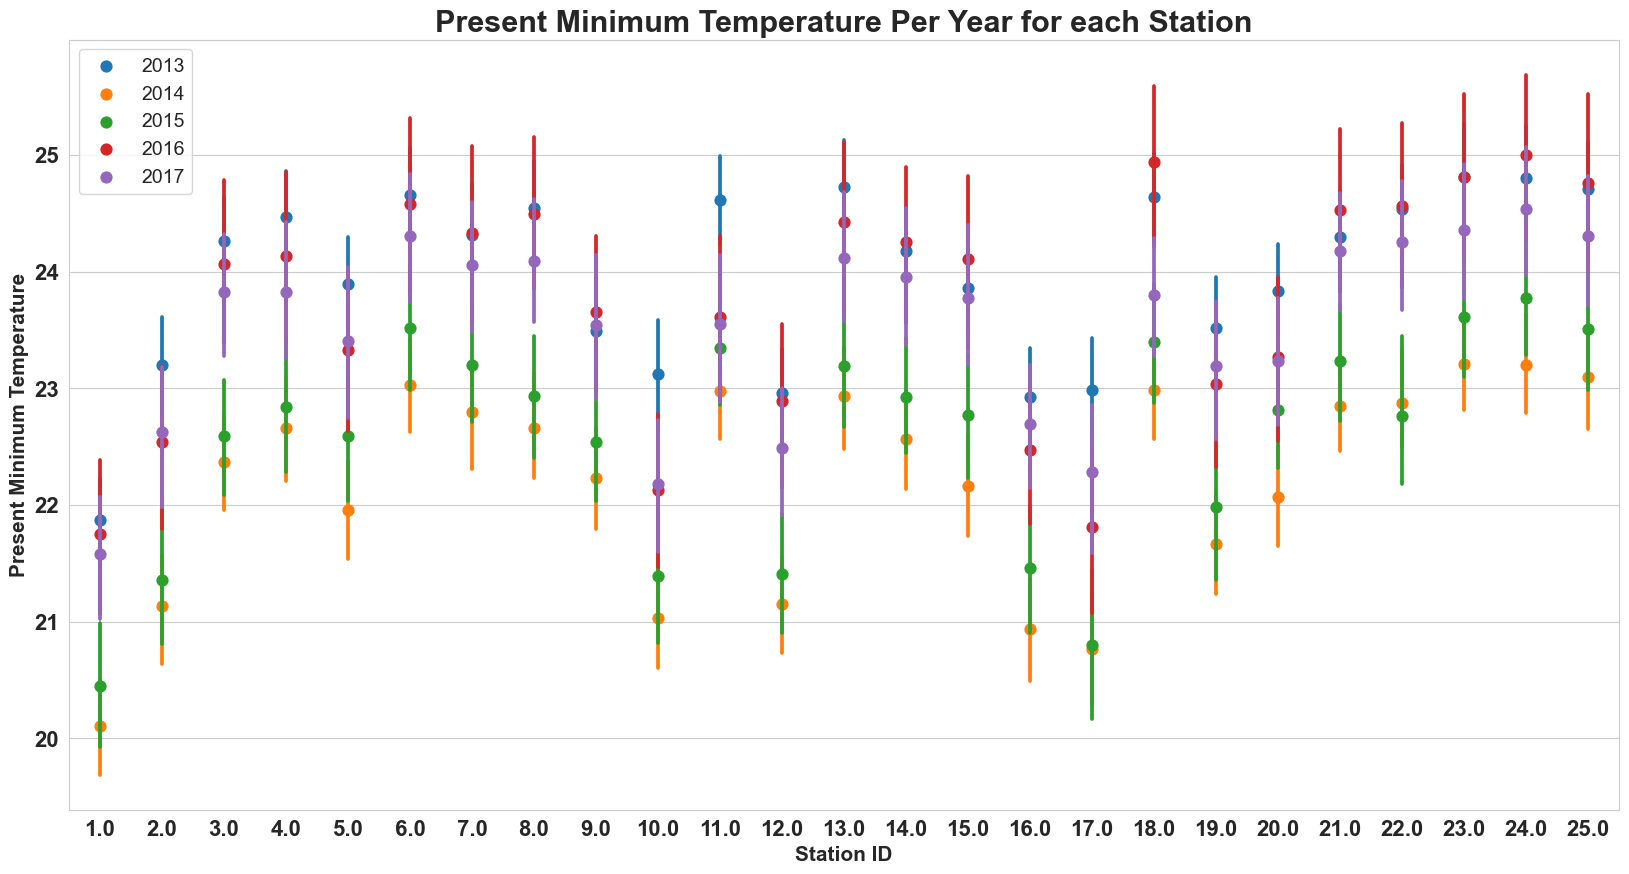

In [17]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.pointplot(x='station', y='Present_Tmin', data=df, hue='Year',join=False)
plt.title('Present Minimum Temperature Per Year for each Station', fontsize=22, fontweight='bold')
plt.xlabel('Station ID',{'fontsize':15,'fontweight' :'bold'})
plt.ylabel('Present Minimum Temperature',{'fontsize':15,'fontweight' :'bold'})
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=14)

Year 2014 is coolest year of all time frame.

Highest Present Minimum Temperature recorded at Station 24 inspite of Not having Highest Present Maximum Temperature. This is implies that over day period minimum temperature drop recorded at station 24.

Station 1 is coolest station of all time followed by station 17. Must be tourist spot in Summer.

# Exploration of Target Variable

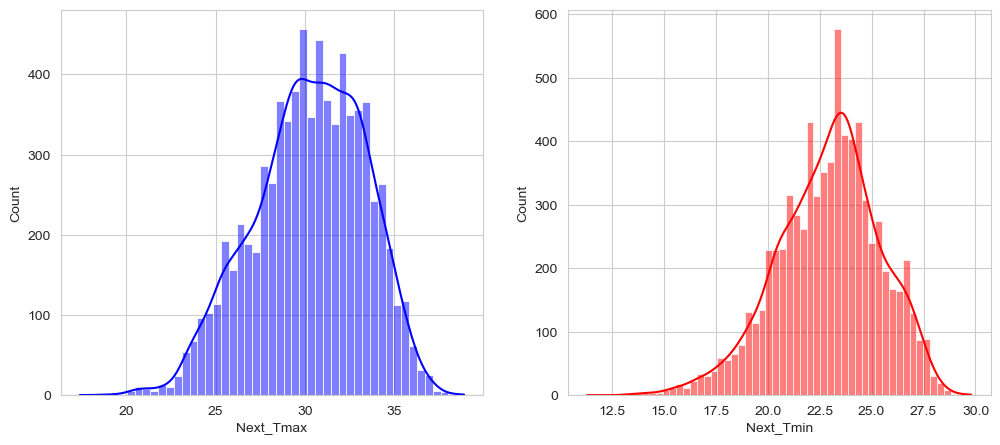

In [18]:
# Plotting histogram for target variables
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Next_Tmax'],kde=True,color='b')
plt.subplot(1,2,2)
sns.histplot(df['Next_Tmin'],kde=True,color='r')
plt.show()

For majority of reading Next Temperature Maximum varies in between 27.5 to 32.5 degree...
For majority of reading Next Temperature Minimum varies in between 22.5 to 26 degree.

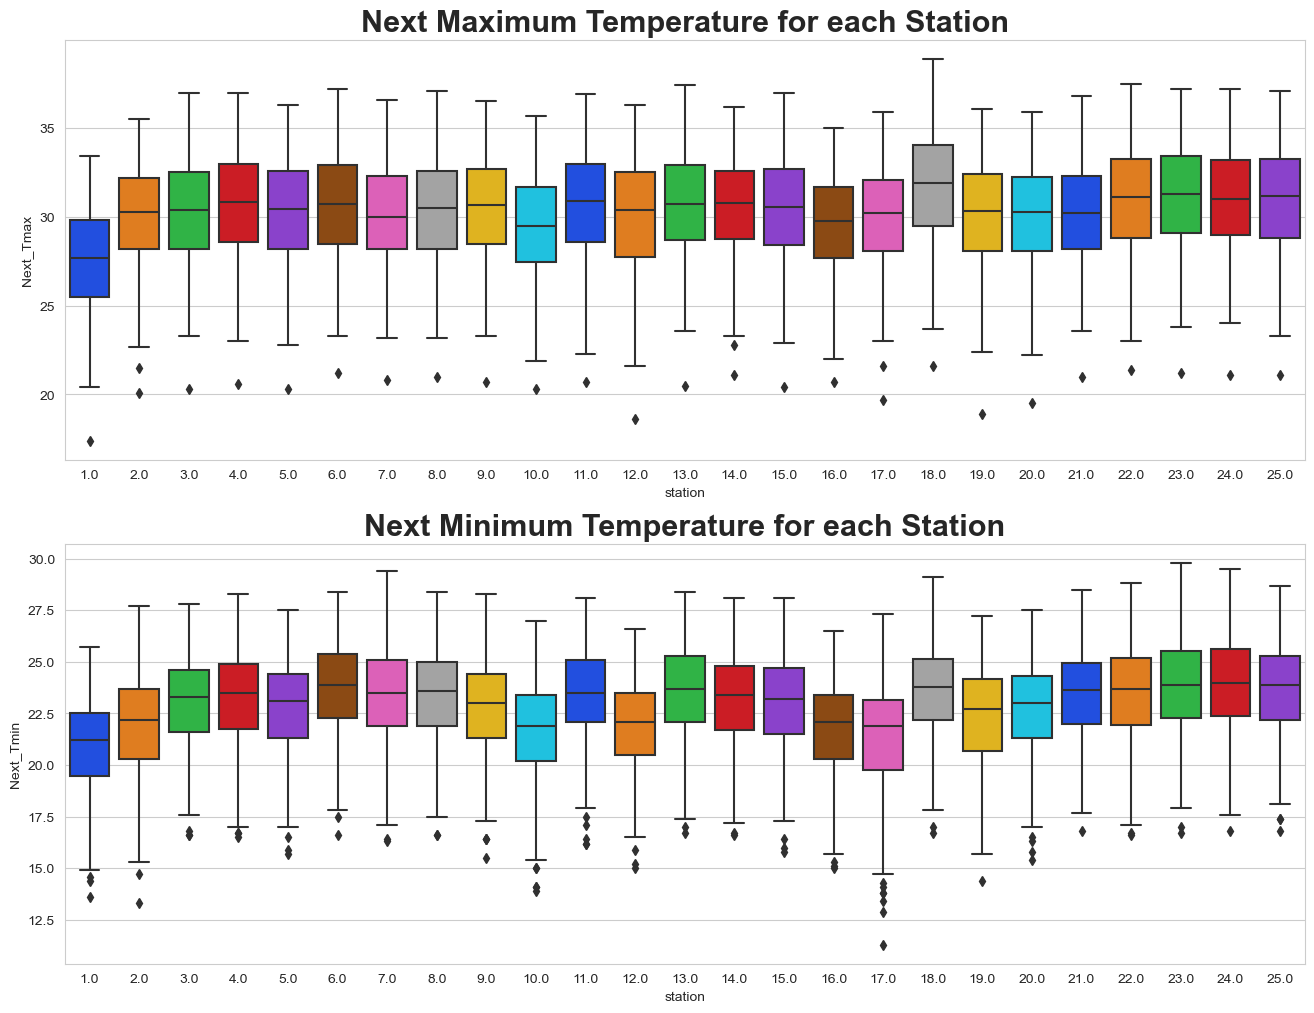

In [19]:
# Visualizing the realtion between station and target variables
plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
sns.boxplot(data=df, x='station', y='Next_Tmax', palette="bright")
plt.title('Next Maximum Temperature for each Station', fontsize=22, fontweight='bold')
plt.subplot(2,1,2)
sns.boxplot(data=df, x='station', y='Next_Tmin', palette="bright")
plt.title('Next Minimum Temperature for each Station', fontsize=22, fontweight='bold')
plt.show()

we can notice the station 18 has highest temperature collection for both Next_Tmax and Next_Tmin targets...
Maximum temperature difference at same station occur in station 17.

### Next Maximum Temperature Vs Cloud cover

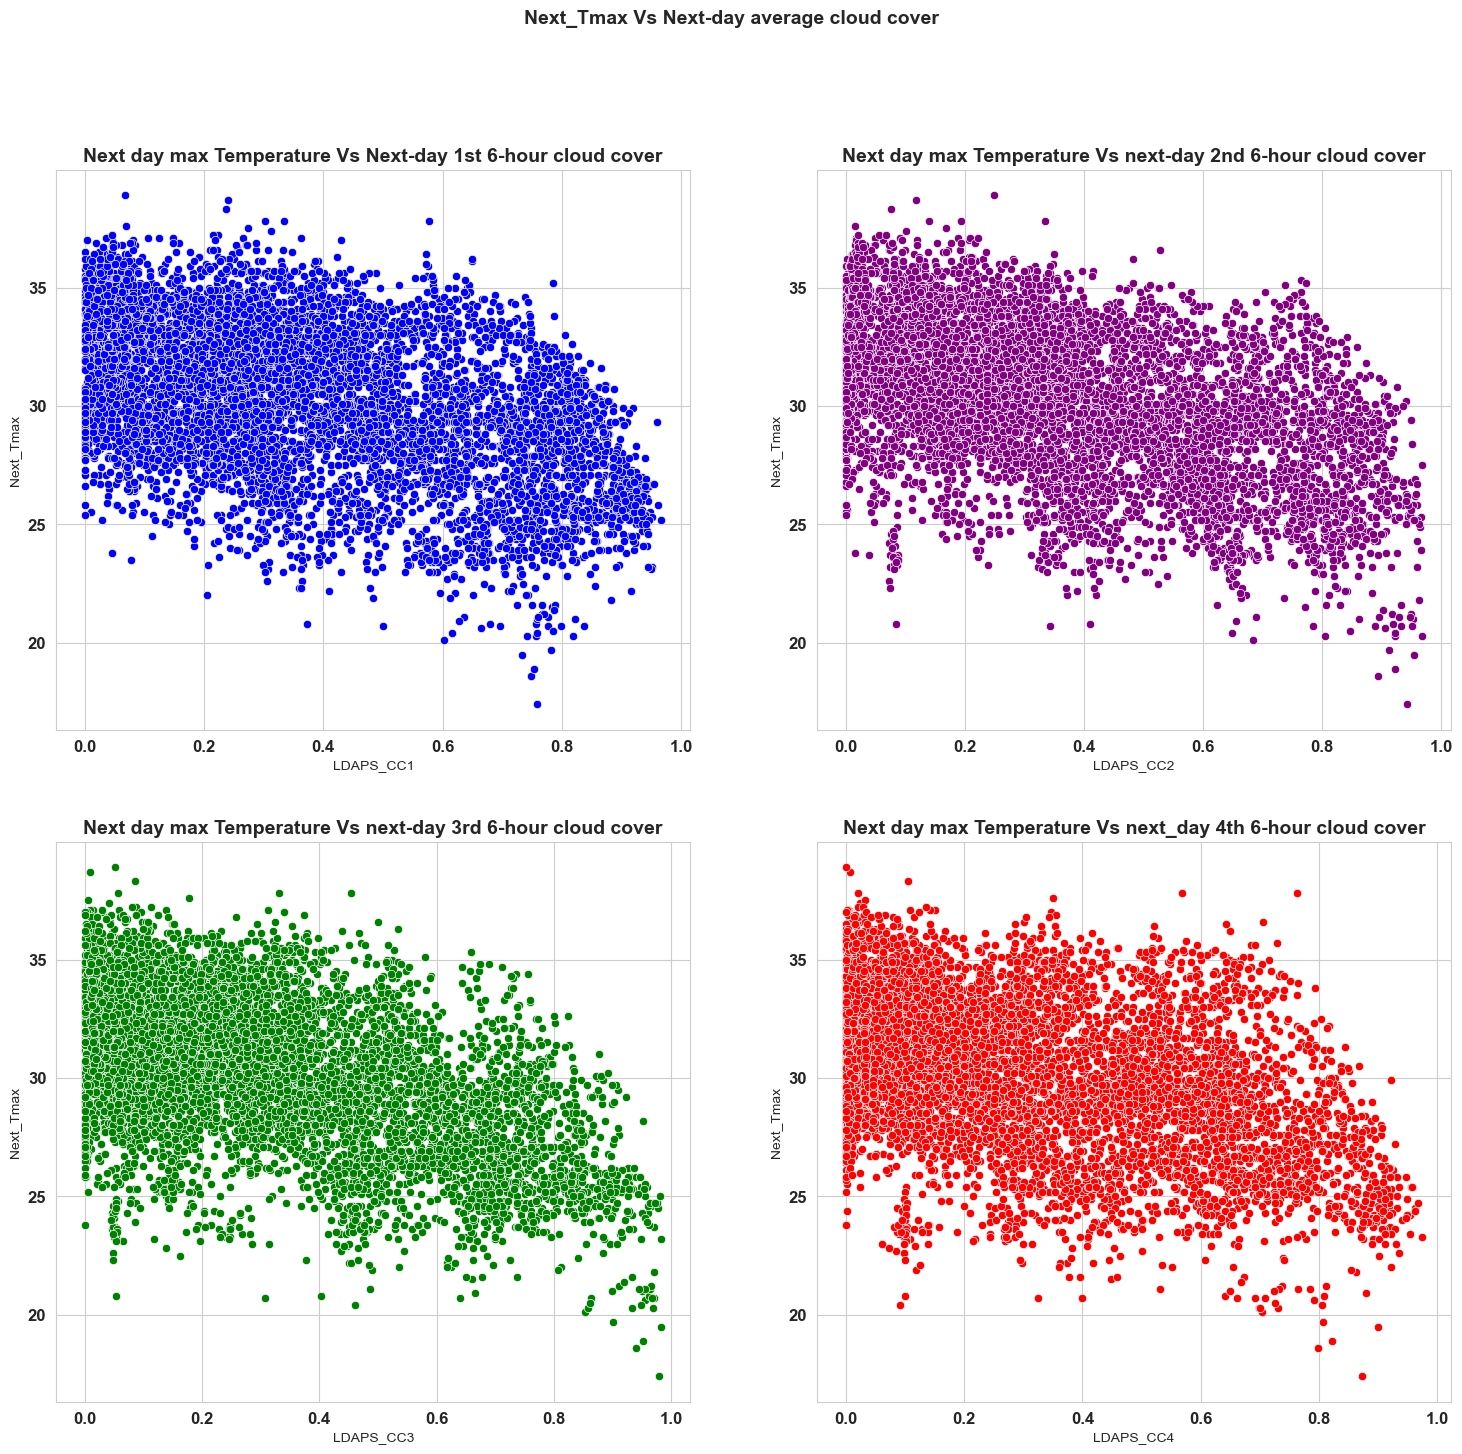

In [20]:
# Comparing Next day maximnum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Next_Tmax Vs Next-day average cloud cover',fontsize=14, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next day max Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmax',data=df,color="blue")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next day max Temperature Vs next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmax',data=df,color='purple')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next day max Temperature Vs next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmax',data=df,color='green')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next day max Temperature Vs next_day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmax',data=df,color="red")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

Irrespective of 6 hr quarter in 24 hr day time, Next-day Temperature Maximum decreases as cloud cover increases beyond 0.6.

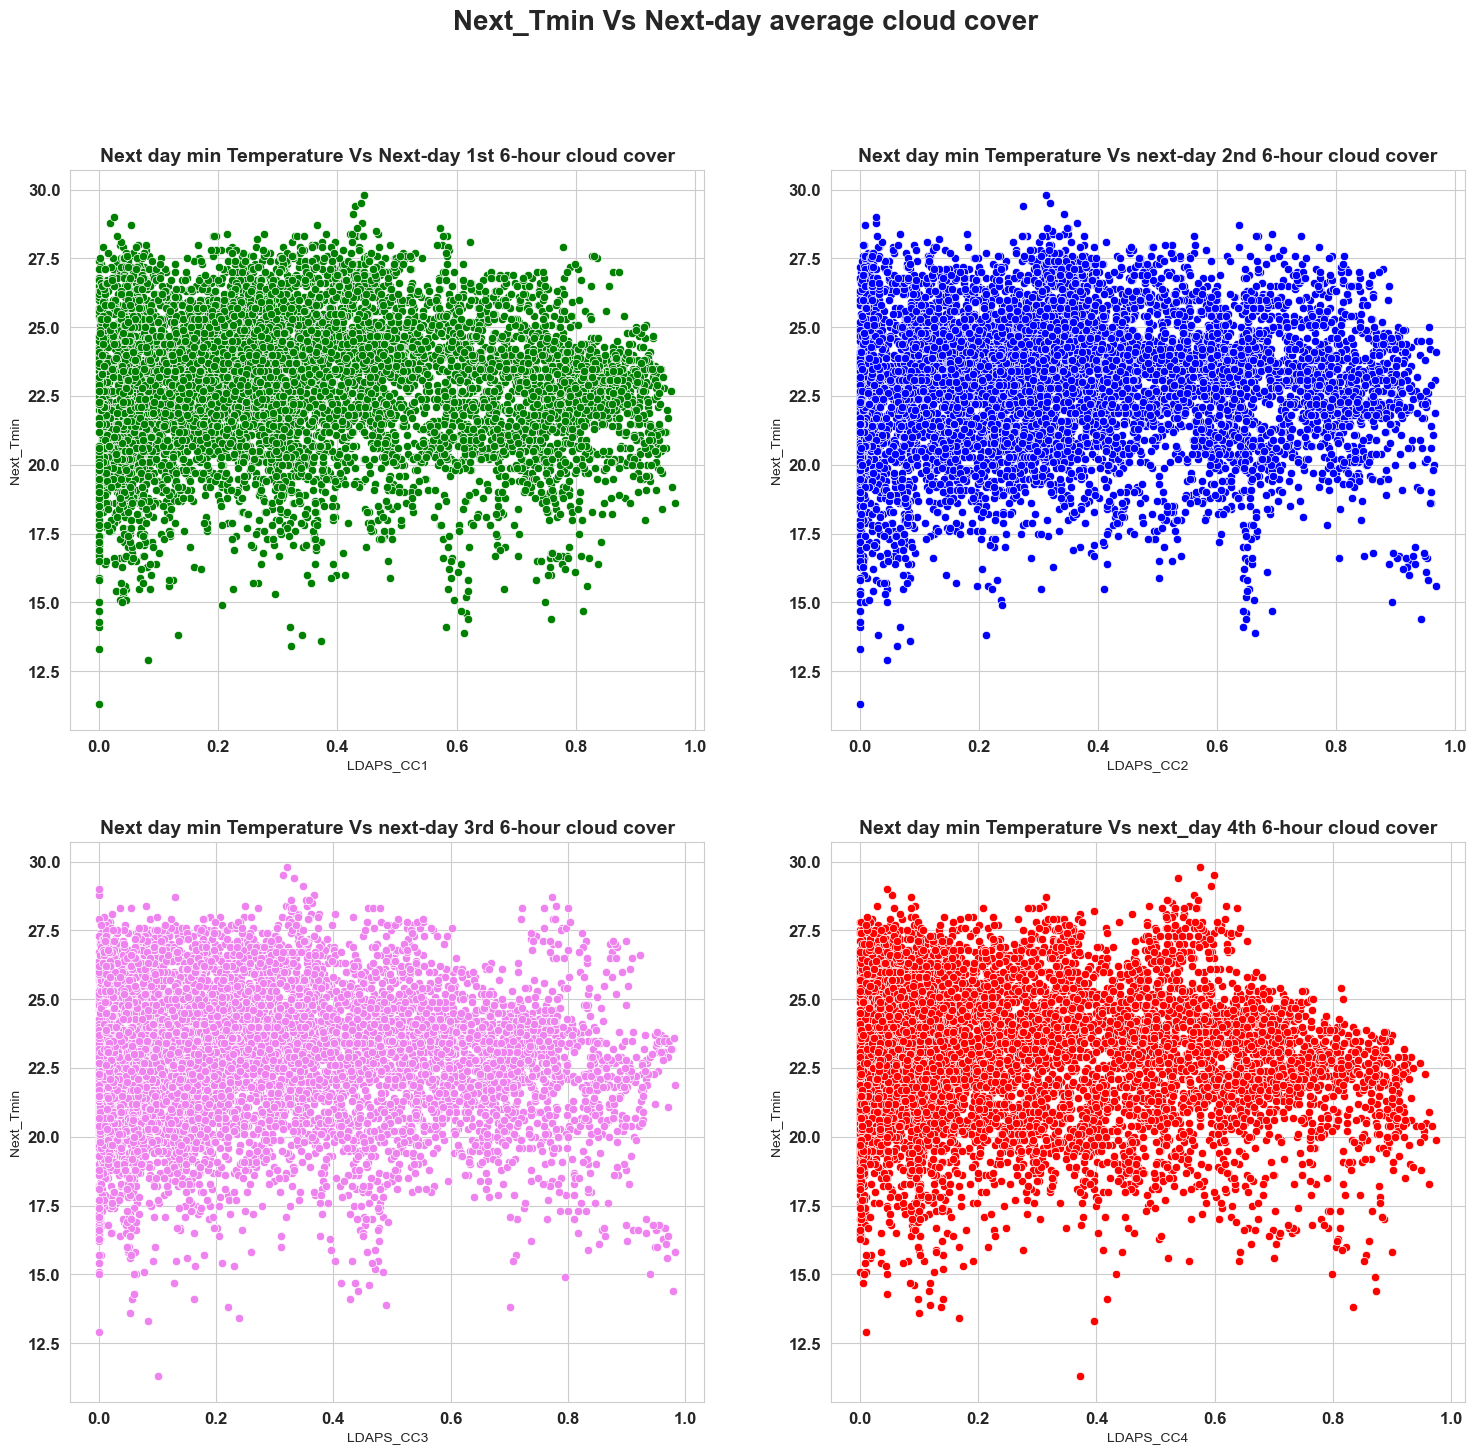

In [21]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Next_Tmin Vs Next-day average cloud cover',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next day min Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmin',data=df,color="g")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next day min Temperature Vs next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmin',data=df,color='b')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next day min Temperature Vs next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmin',data=df,color='violet')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next day min Temperature Vs next_day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmin',data=df,color="r")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

No significant relation between Next_Tmin and cloud cover in scatterplot...We can say that Next_Tmin remains unaffected by cloud cover.

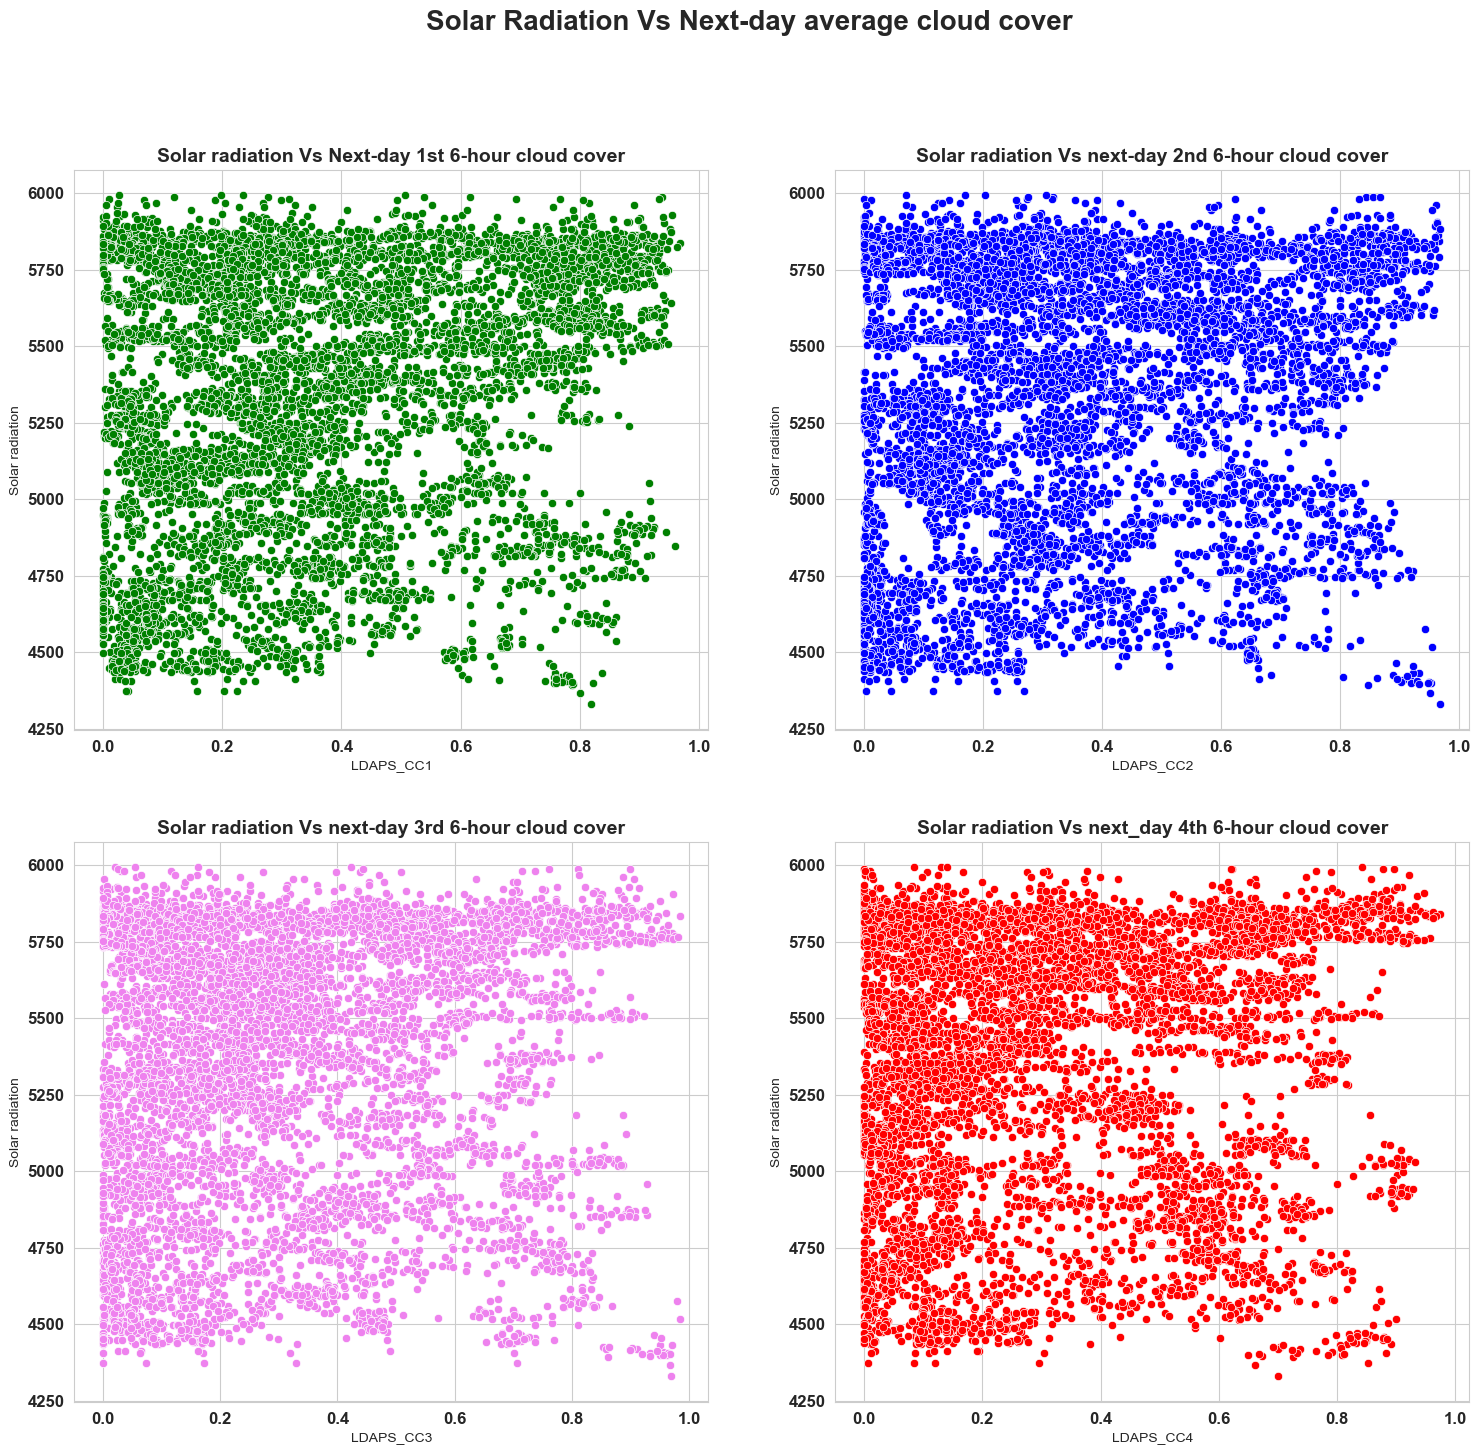

In [22]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Solar Radiation Vs Next-day average cloud cover',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Solar radiation Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Solar radiation',data=df,color="g")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Solar radiation Vs next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Solar radiation',data=df,color='b')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Solar radiation Vs next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Solar radiation',data=df,color='violet')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Solar radiation Vs next_day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Solar radiation',data=df,color="r")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

We can definitely say that for cloud cover greater than 0.7 high value solar radiation contributed most.

### Precipitation VS Solar radiation

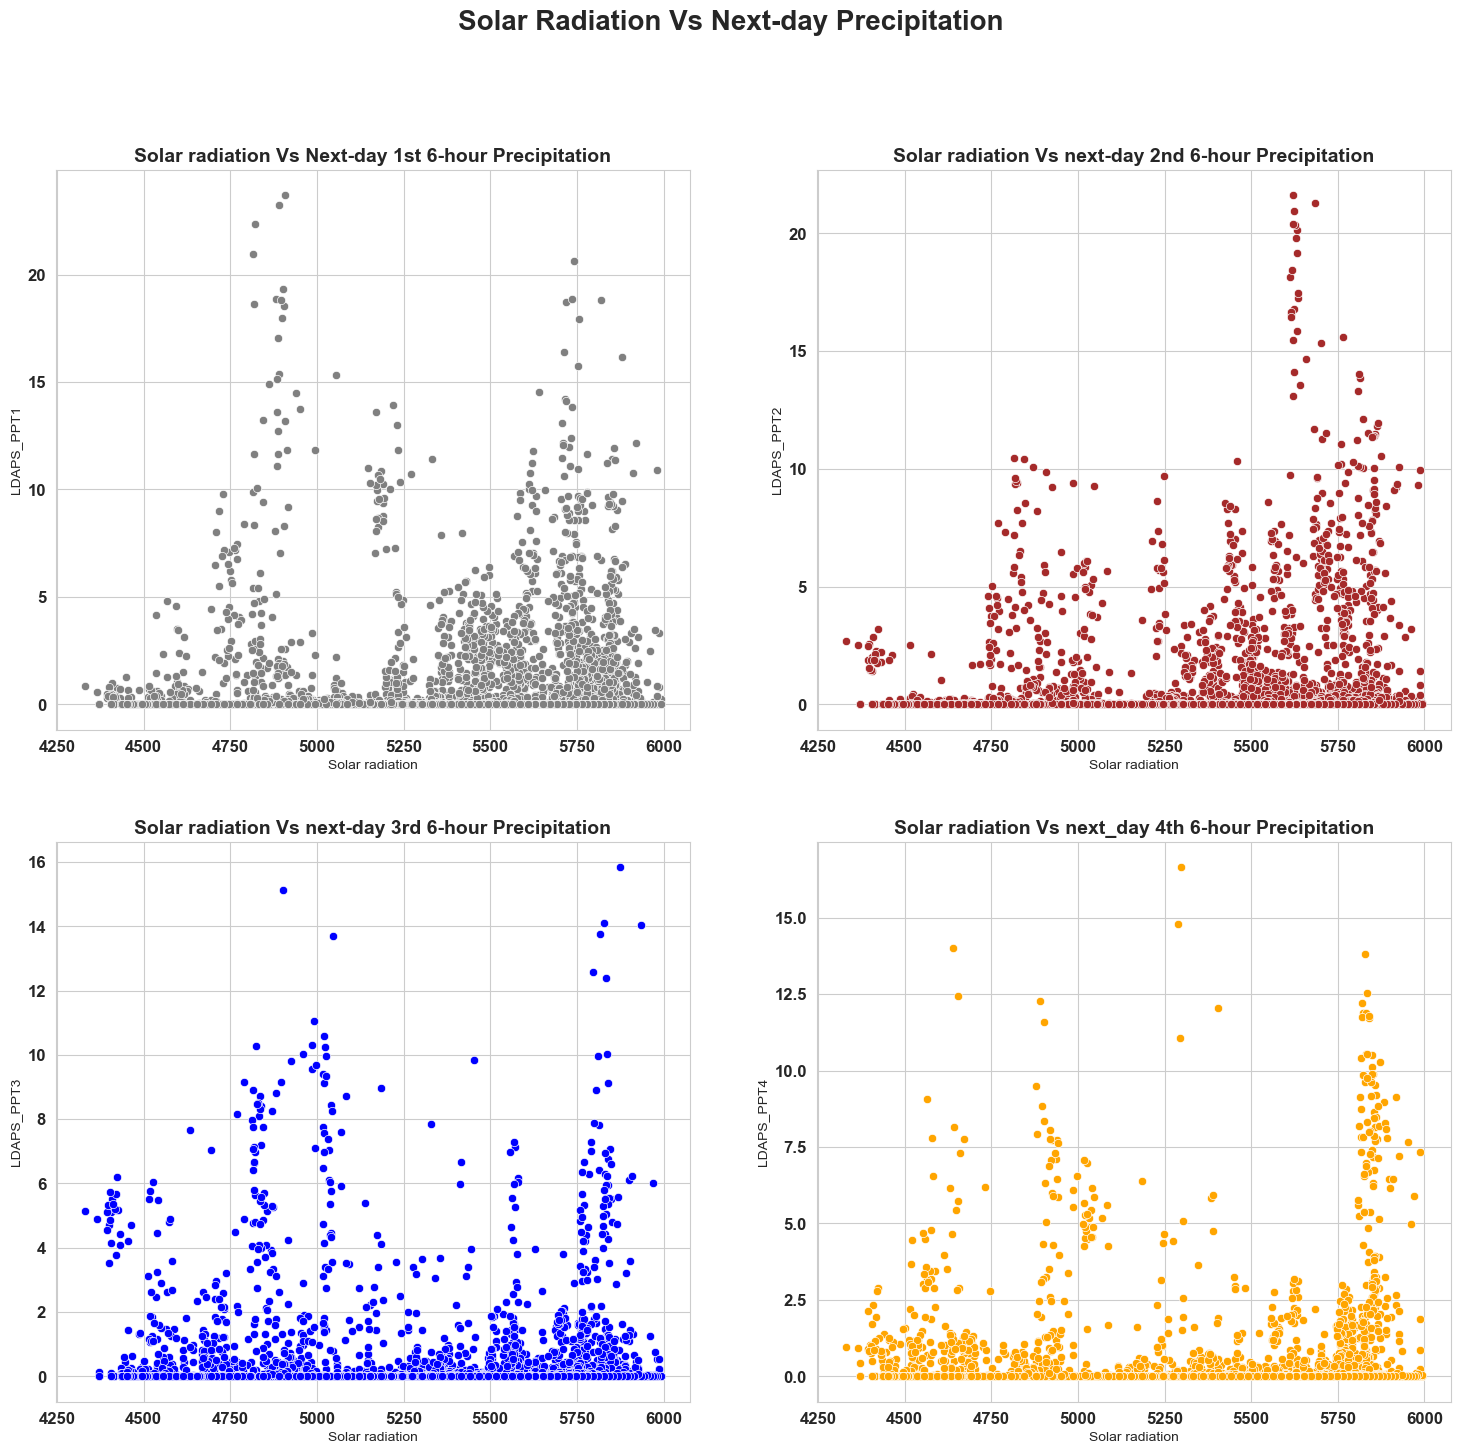

In [23]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Solar Radiation Vs Next-day Precipitation',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Solar radiation Vs Next-day 1st 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT1',x='Solar radiation',data=df,color="grey")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Solar radiation Vs next-day 2nd 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT2',x='Solar radiation',data=df,color='brown')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Solar radiation Vs next-day 3rd 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT3',x='Solar radiation',data=df,color='blue')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Solar radiation Vs next_day 4th 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT4',x='Solar radiation',data=df,color="orange")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

Irrespective of to which 6 hr quarter reading belong, solar radiation value greater than 5500w/m2 leads to higher amount of precipitation (normally greater than 8).

If we consider scatterplot of solar radiation vs cloud cover along with above scatter plot, we can draw inference that for higher value of solar radiation cloud cover and precipitation followed each other. In other words higher precipitation means higher cloud cover.

Minimum Solar radiation : 4329.520508
Maximum Solar radiation : 5992.895996
Average Solar radiation : 5343.724207856747


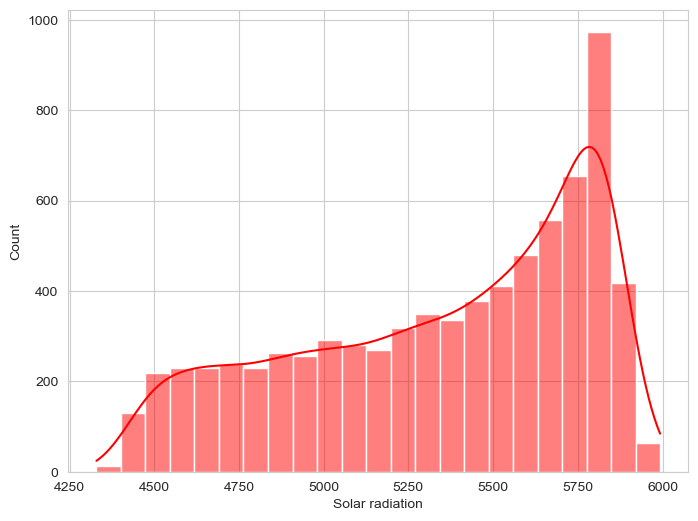

In [25]:
plt.figure(figsize=(8,6))
sns.histplot(df['Solar radiation'],kde=True,color='r')
print('Minimum Solar radiation :',df['Solar radiation'].min())
print('Maximum Solar radiation :',df['Solar radiation'].max())
print('Average Solar radiation :',df['Solar radiation'].mean())

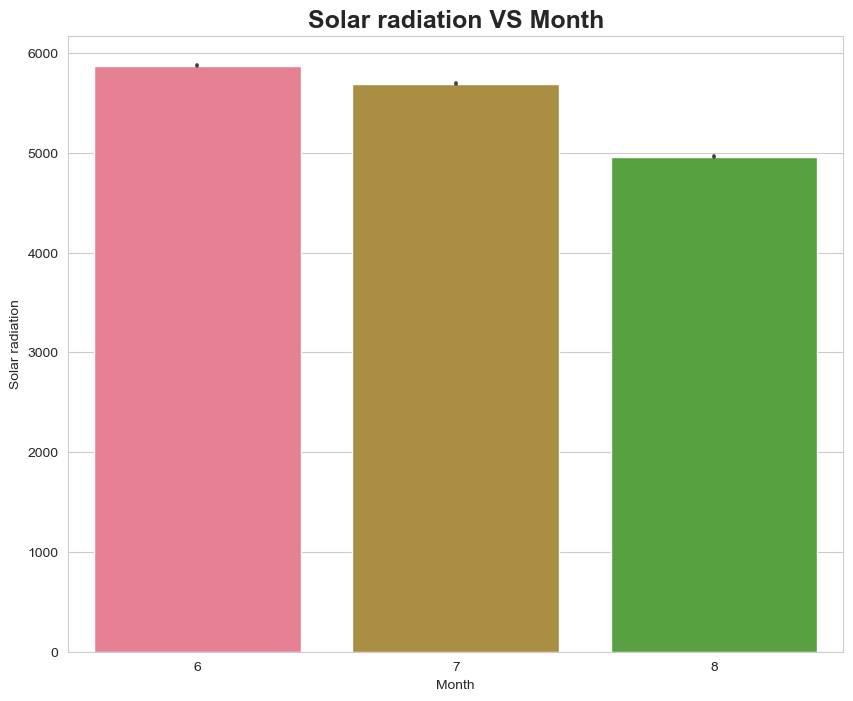

In [27]:
sns.set_palette('husl')
plt.figure(figsize=(10,8))
sns.barplot(y=df['Solar radiation'], x=df['Month'])
plt.title('Solar radiation VS Month',fontsize=18, fontweight='bold')
plt.show()

Minimum Wind Speed : 2.882579625 m/s
Maximum Wind Speed : 21.85762099 m/s
Average Wind Speed : 7.0940966991598575 m/s


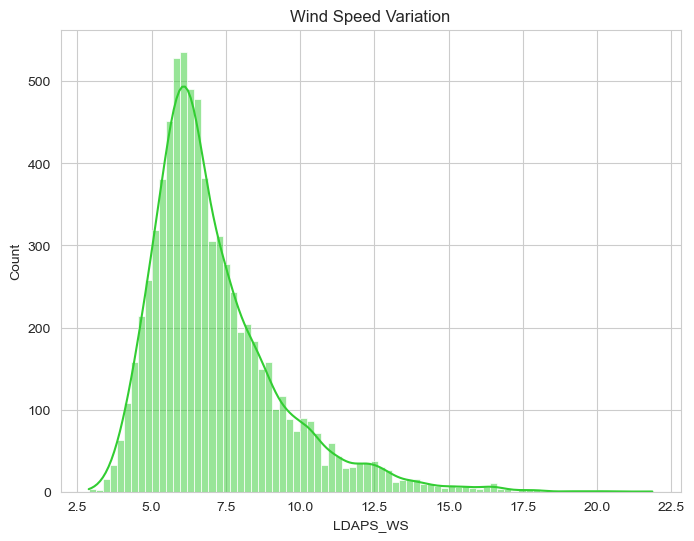

In [28]:
plt.figure(figsize=(8,6))
sns.histplot(df['LDAPS_WS'],kde=True,color='limegreen')
plt.title('Wind Speed Variation')
print('Minimum Wind Speed :',df['LDAPS_WS'].min(),'m/s')
print('Maximum Wind Speed :',df['LDAPS_WS'].max(),'m/s')
print('Average Wind Speed :',df['LDAPS_WS'].mean(),'m/s')

It have its minimum value at 2.88m/s and maximum values at 21.85m/s...
For most of reading values lies in the rabge 5m/s to 8m/s...
Graph is slightly right skewed.

Minimum RHmax is 58.93628311 % and Maximum RHmax is 100.0001526 %
Minimum RHmin is 19.79466629 % and Maximum RHmin is 98.5247345 %


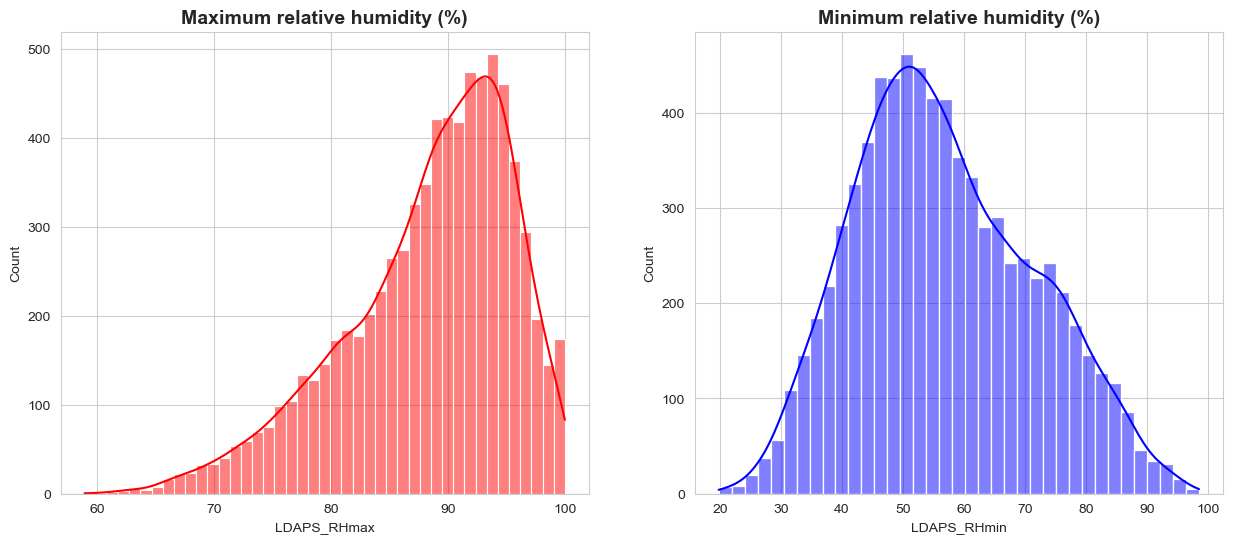

In [29]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_RHmax'],kde=True,color='r')
plt.title('Maximum relative humidity (%)',fontsize=14, fontweight='bold')
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_RHmin'],kde=True,color='b')
plt.title('Minimum relative humidity (%)',fontsize=14, fontweight='bold')
print('Minimum RHmax is {} % and Maximum RHmax is {} %'.format(df['LDAPS_RHmax'].min(),df['LDAPS_RHmax'].max()))
print('Minimum RHmin is {} % and Maximum RHmin is {} %'.format(df['LDAPS_RHmin'].min(),df['LDAPS_RHmin'].max()))

Data of Maximum Relative humidity is left skewed and Data of Minimum Relative humidity is slightly right skewed....
Maximum Relative humidity for most of the days lie in the range 90 to 97....
Maximum Relative humidity lies in the range 45 to 62.

Minimum Tmax applied lapse rate is 17.62495378 (Â°C) and Maximum Tmax applied lapse rate is 38.54225522 (Â°C)
Minimum Tmin is applied lapse rate 14.27264631 (Â°C) and Maximum Tmin applied lapse rate is 29.61934244 (Â°C)


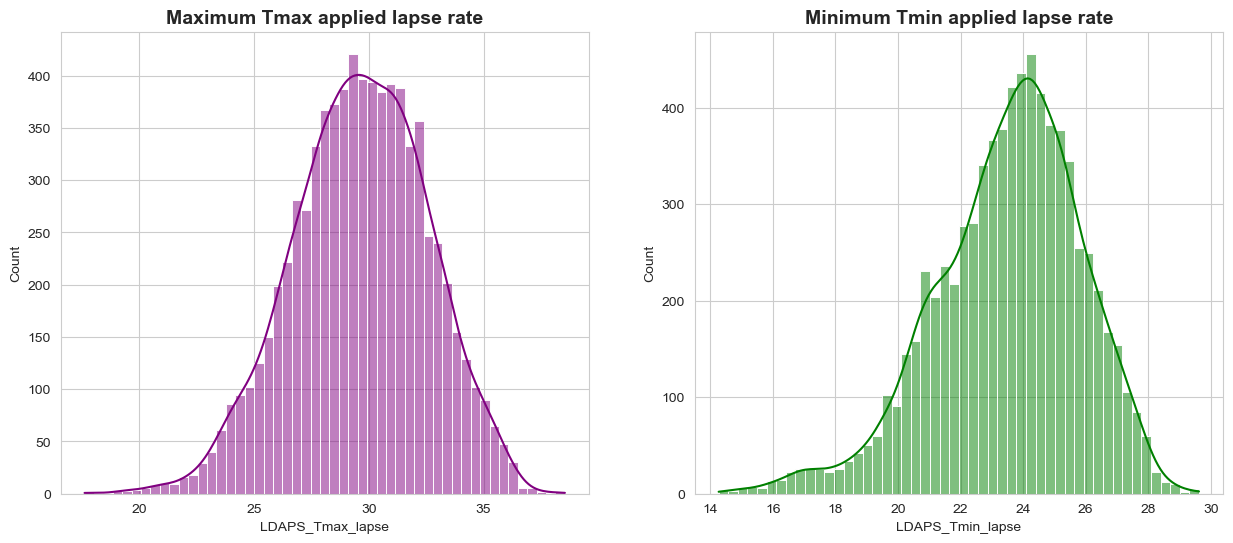

In [30]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_Tmax_lapse'],kde=True,color='purple')
plt.title('Maximum Tmax applied lapse rate',fontsize=14, fontweight='bold')
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_Tmin_lapse'],kde=True,color='green')
plt.title('Minimum Tmin applied lapse rate',fontsize=14, fontweight='bold')
print('Minimum Tmax applied lapse rate is {} (Â°C) and Maximum Tmax applied lapse rate is {} (Â°C)'.format(df['LDAPS_Tmax_lapse'].min(),df['LDAPS_Tmax_lapse'].max()))
print('Minimum Tmin is applied lapse rate {} (Â°C) and Maximum Tmin applied lapse rate is {} (Â°C)'.format(df['LDAPS_Tmin_lapse'].min(),df['LDAPS_Tmin_lapse'].max()))

Tmax and Tmin for applied lapse rate are almost normally distributed....
Tmax_lapse for majority of days its values lies in the range 27 to 33 (Â°C)....
Tmin_lapse for majority of days its values lies in the range 23 to 26 (Â°C).

Minimum Latent Heat Flux : -13.60321209
Maximum Latent Heat Flux : 213.4140062
Average Latent Heat Flux : 62.492606287988


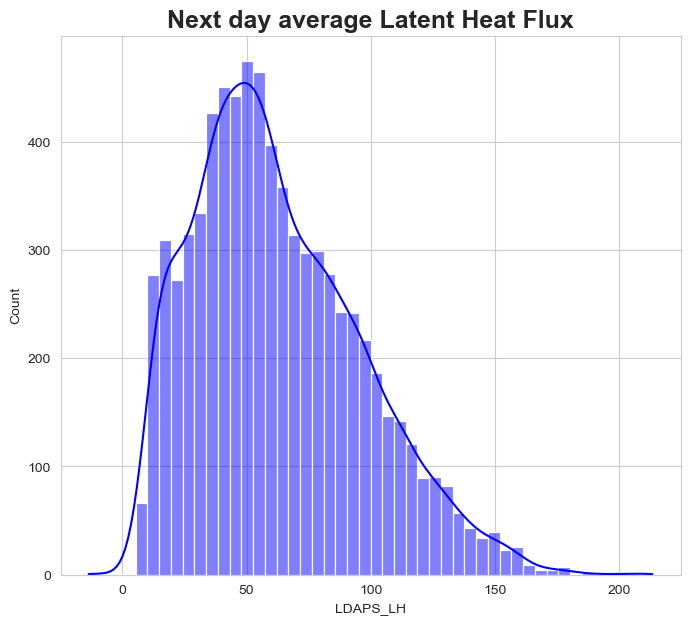

In [31]:
plt.figure(figsize=(8,7))
sns.histplot(df['LDAPS_LH'],kde=True,color='blue')
plt.title('Next day average Latent Heat Flux',fontsize=18, fontweight='bold')
print('Minimum Latent Heat Flux :',df['LDAPS_LH'].min())
print('Maximum Latent Heat Flux :',df['LDAPS_LH'].max())
print('Average Latent Heat Flux :',df['LDAPS_LH'].mean())

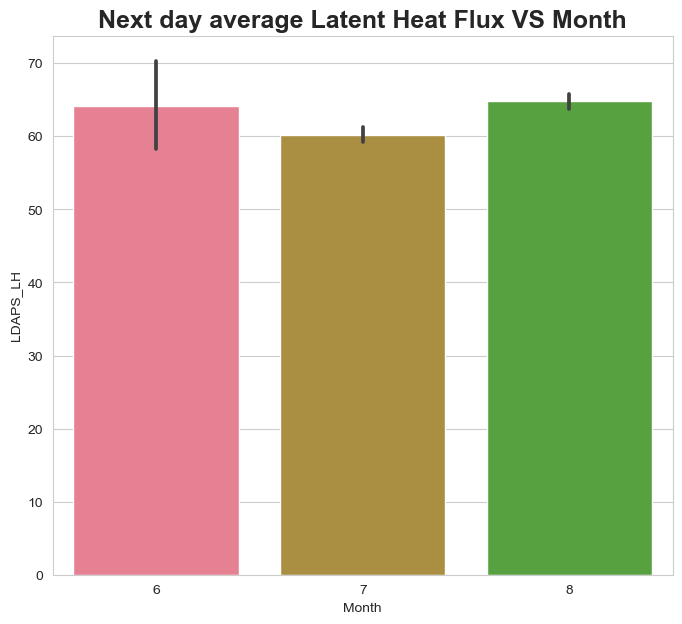

In [32]:
plt.figure(figsize=(8,7))
sns.barplot(y=df['LDAPS_LH'], x=df['Month'])
plt.title('Next day average Latent Heat Flux VS Month',fontsize=18, fontweight='bold')
plt.show()

Minimum Latent Heat Flux observe in month of July.

In [33]:
# Droping unnecessary columns
df.drop(['Date'], axis=1, inplace=True)

# Feature selection and Engineering

### 1. Outliers Detection and Removal

In [34]:
df.shape

(7588, 27)

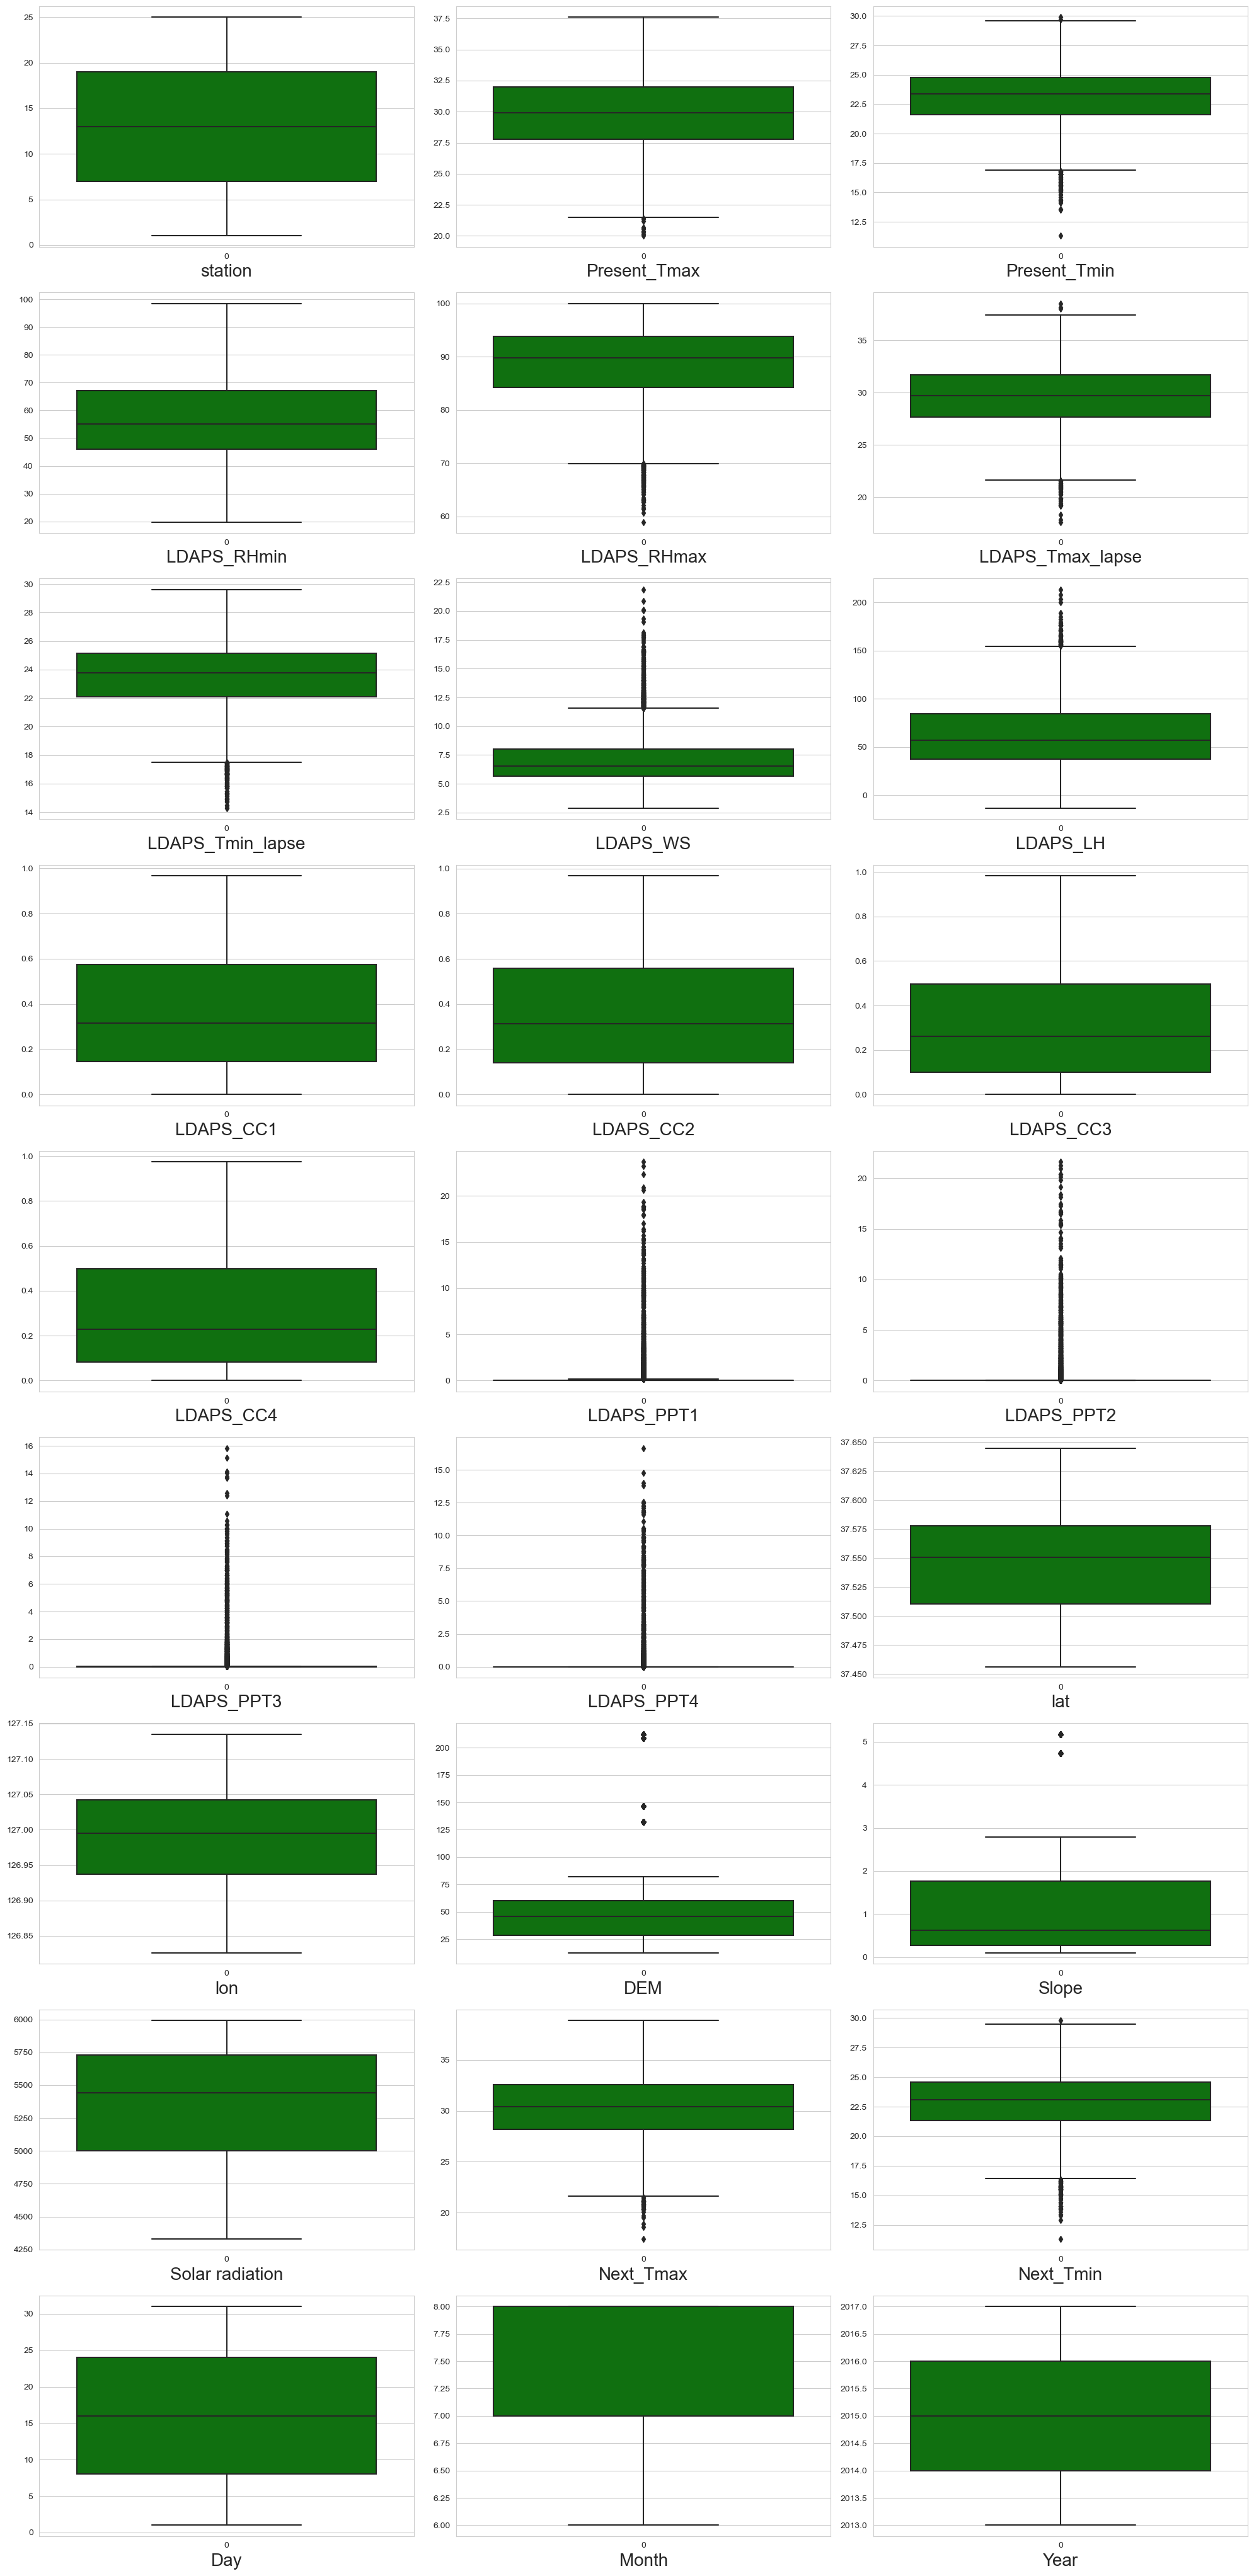

In [35]:
plt.figure(figsize=(20,45),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=27:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

From Boxplot we can see outliers exist dataset.

### Outliers removal using Zscore method

In [37]:
# from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (6739, 27)
Shape of the dataframe after removing outliers:  (5998, 27)
Percentage of data loss post outlier removal:  10.995696690903694


### 2. Skewness of features

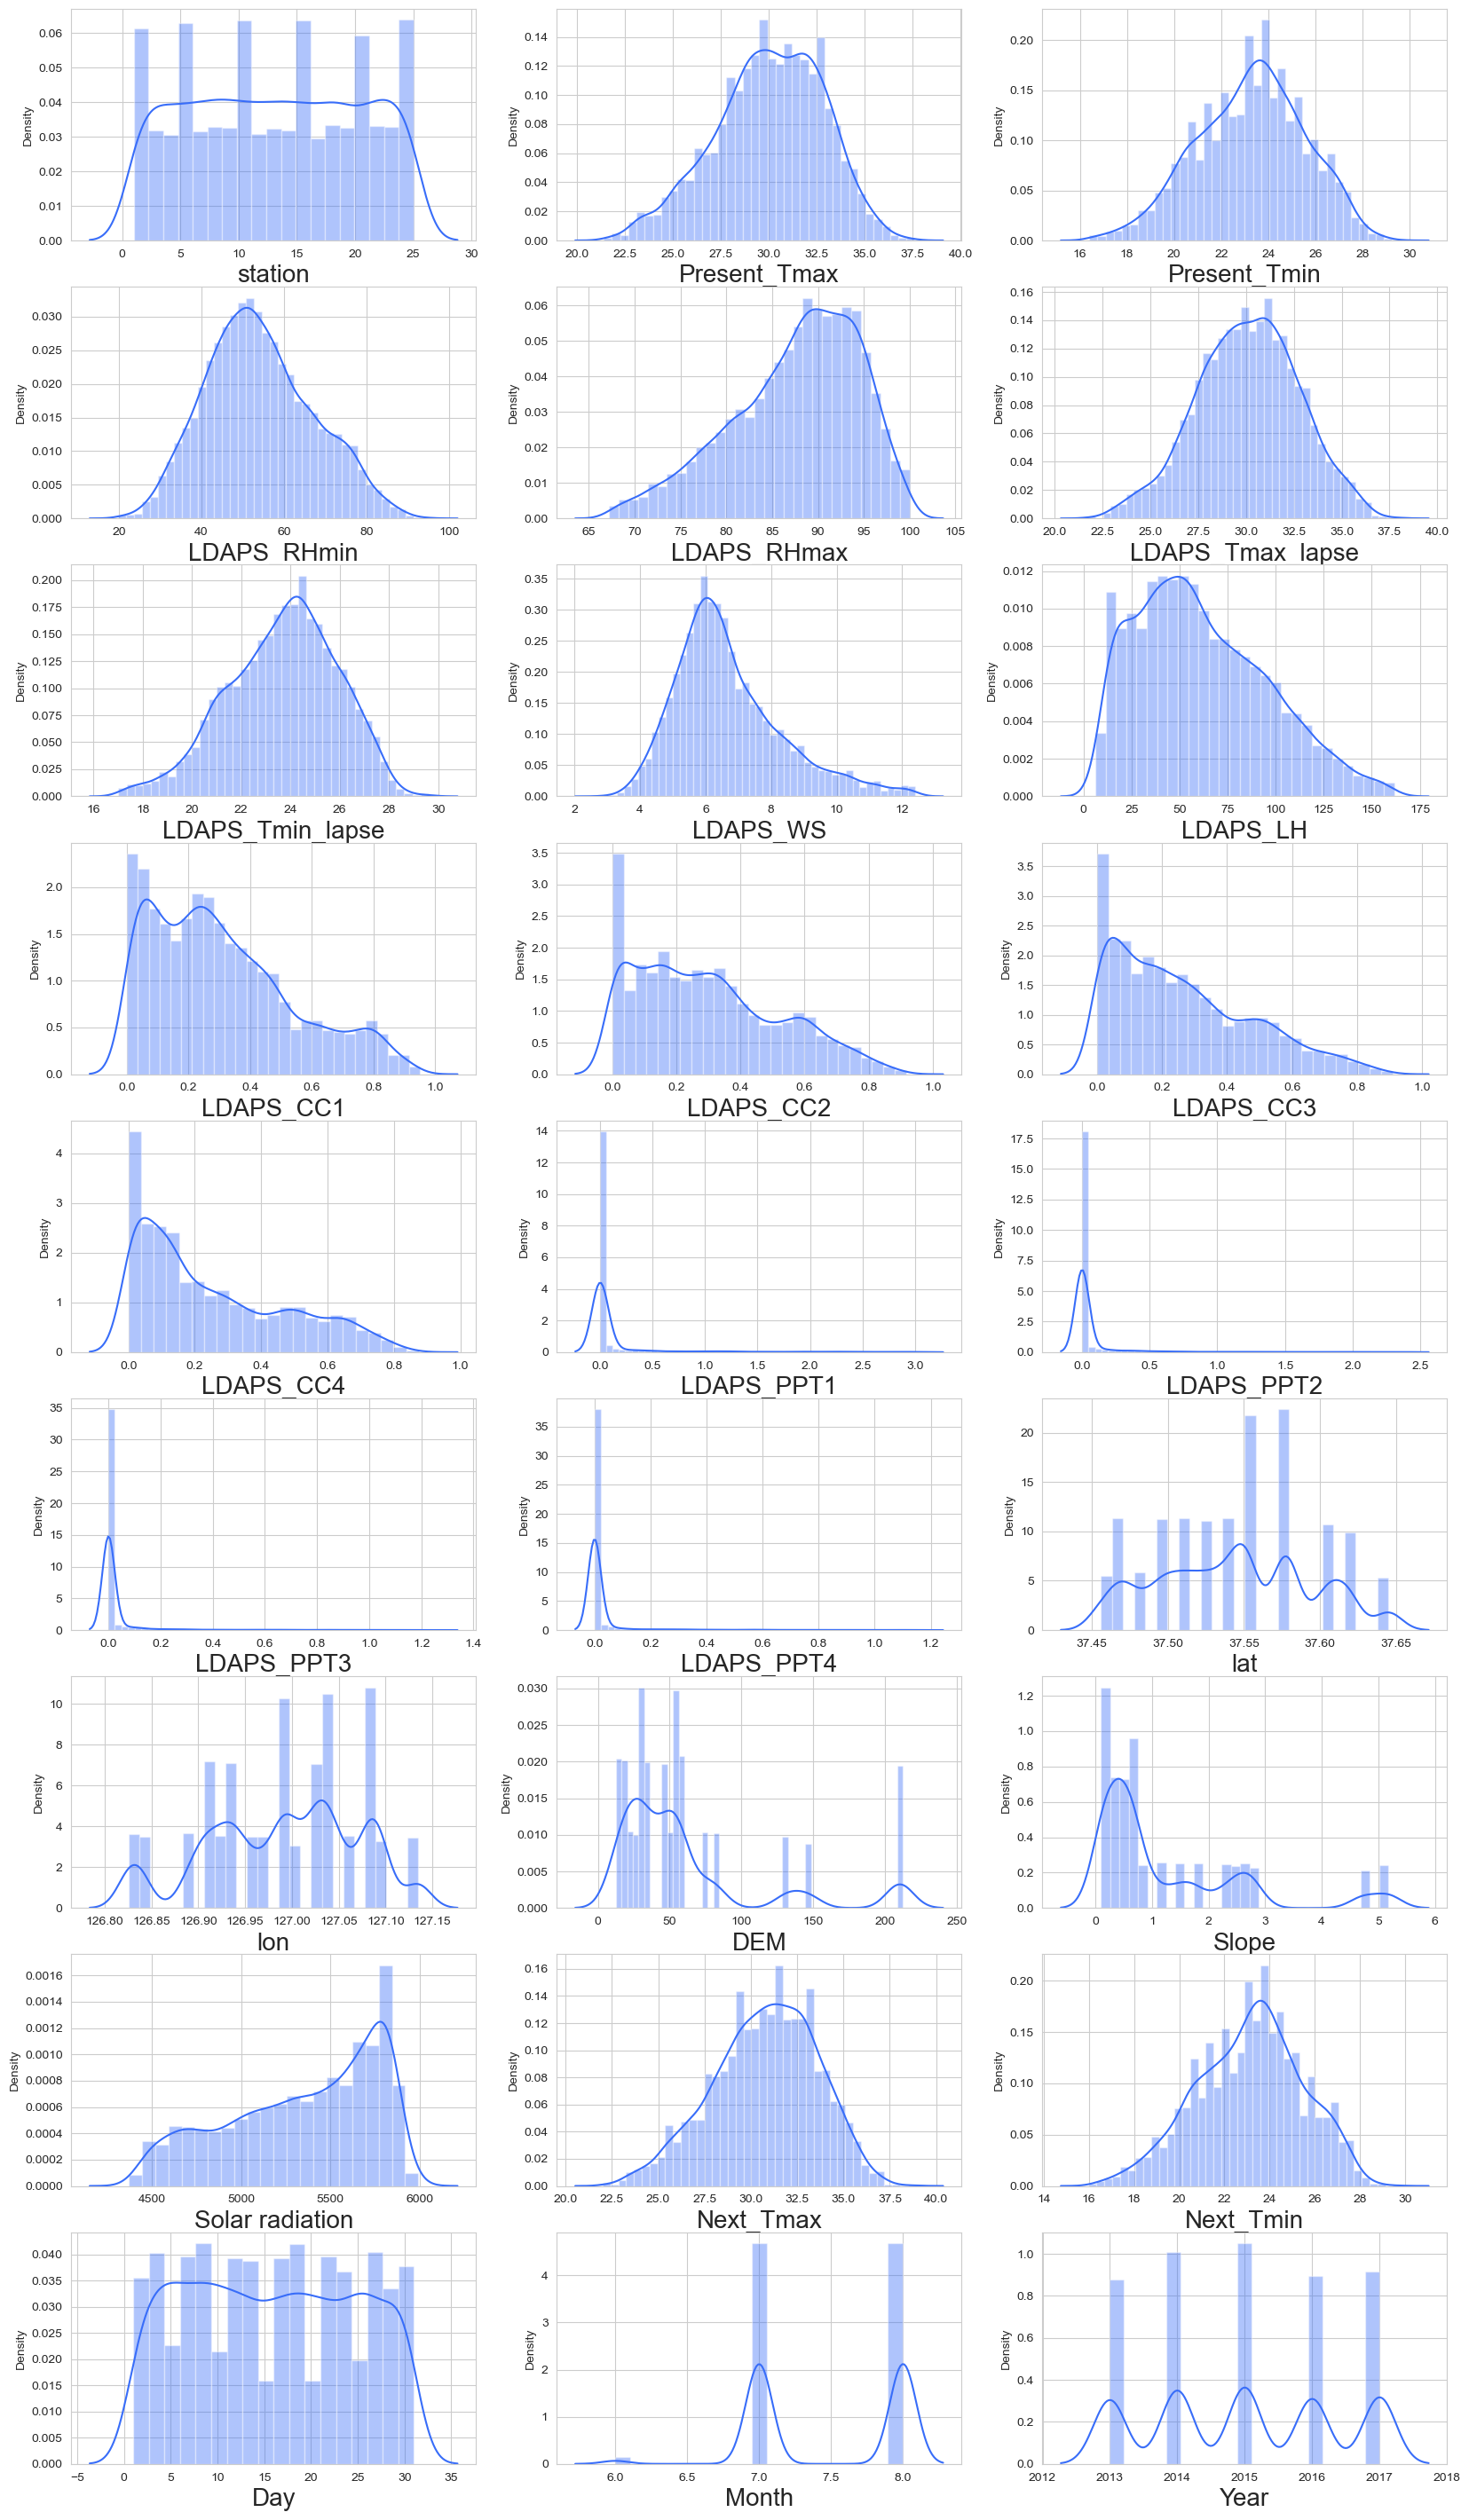

In [38]:
plt.figure(figsize=(20,40),facecolor='white')
sns.set_palette('rainbow')
plotnum=1
for col in df:
    if plotnum<=27:
        plt.subplot(10,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Skewness is important feature for continous data. There is no relevence of skweness for discrete numerical feature like month and categorical feature.So we gone ignore skewness present in discrete numerical and categorical feature.

We are also going to ignore sknewness in target feature.

In [39]:
df.skew()

station             0.000271
Present_Tmax       -0.312327
Present_Tmin       -0.187519
LDAPS_RHmin         0.282541
LDAPS_RHmax        -0.613357
LDAPS_Tmax_lapse   -0.115618
LDAPS_Tmin_lapse   -0.313847
LDAPS_WS            0.948074
LDAPS_LH            0.551914
LDAPS_CC1           0.709561
LDAPS_CC2           0.536972
LDAPS_CC3           0.730558
LDAPS_CC4           0.755543
LDAPS_PPT1          4.162255
LDAPS_PPT2          5.149545
LDAPS_PPT3          5.640926
LDAPS_PPT4          5.560257
lat                 0.112040
lon                -0.276764
DEM                 1.782906
Slope               1.602578
Solar radiation    -0.507808
Next_Tmax          -0.286413
Next_Tmin          -0.203663
Day                 0.038317
Month              -0.214078
Year                0.033313
dtype: float64

Here some are positively skewed while others are negatively skewed. We are going to use yeo-johnson method for transfromation.

In [40]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4',
      'LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Month']

# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df[skew] = scaler.fit_transform(df[skew].values)

### 3. Corrleation

In [41]:
df.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.116379      0.137412    -0.073661   
Present_Tmax      0.116379      1.000000      0.608934    -0.147635   
Present_Tmin      0.137412      0.608934      1.000000     0.147548   
LDAPS_RHmin      -0.073661     -0.147635      0.147548     1.000000   
LDAPS_RHmax      -0.191356     -0.308878     -0.067012     0.533683   
LDAPS_Tmax_lapse  0.070175      0.555854      0.467107    -0.529557   
LDAPS_Tmin_lapse  0.113607      0.623987      0.771180     0.140279   
LDAPS_WS          0.027075     -0.031827      0.053971     0.106578   
LDAPS_LH         -0.142623      0.114768     -0.012090     0.023403   
LDAPS_CC1         0.008634     -0.289908      0.069933     0.518120   
LDAPS_CC2         0.009721     -0.154055      0.099702     0.673646   
LDAPS_CC3        -0.001619     -0.057630      0.032701     0.597662   
LDAPS_CC4         0.005759     -0.023832      0.000452     0.423856   
LDAPS_PPT1       -0.005211     -0.178380      0.041491     0.333516   
LDAPS_PPT2       -0.002105     -0.086429      0.065596     0.432778   
LDAPS_PPT3       -0.026581     -0.012192      0.021854     0.353339   
LDAPS_PPT4       -0.006372      0.003110     -0.064689     0.192082   
lat              -0.242709     -0.045933     -0.072903     0.069646   
lon              -0.119043      0.006053     -0.041972    -0.108697   
DEM              -0.327517     -0.130825     -0.241530     0.053738   
Slope            -0.147233     -0.090988     -0.162216     0.079201   
Solar radiation  -0.031037     -0.104514     -0.073703     0.219072   
Next_Tmax         0.114126      0.603429      0.474362    -0.407551   
Next_Tmin         0.138509      0.622888      0.797063     0.157246   
Day               0.004791     -0.120533     -0.072543    -0.066196   
Month             0.007374      0.171563      0.128230    -0.171514   
Year              0.001584      0.098082      0.122852     0.013238   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.191356          0.070175          0.113607  0.027075   
Present_Tmax        -0.308878          0.555854          0.623987 -0.031827   
Present_Tmin        -0.067012          0.467107          0.771180  0.053971   
LDAPS_RHmin          0.533683         -0.529557          0.140279  0.106578   
LDAPS_RHmax          1.000000         -0.379563         -0.182142  0.012974   
LDAPS_Tmax_lapse    -0.379563          1.000000          0.626822 -0.088922   
LDAPS_Tmin_lapse    -0.182142          0.626822          1.000000  0.035248   
LDAPS_WS             0.012974         -0.088922          0.035248  1.000000   
LDAPS_LH             0.323292         -0.012039         -0.149186 -0.081699   
LDAPS_CC1            0.364105         -0.384337          0.046105  0.150673   
LDAPS_CC2            0.310449         -0.461422          0.112771  0.109818   
LDAPS_CC3            0.087782         -0.429064          0.056322 -0.000212   
LDAPS_CC4           -0.010490         -0.329669          0.010794  0.015170   
LDAPS_PPT1           0.352754         -0.281915         -0.045850  0.146724   
LDAPS_PPT2           0.316129         -0.302410          0.038487  0.130229   
LDAPS_PPT3           0.192029         -0.253201          0.001455  0.018737   
LDAPS_PPT4           0.072564         -0.161894         -0.054276  0.080426   
lat                  0.220677         -0.023856         -0.090412 -0.030943   
lon                  0.010285          0.120655         -0.025301 -0.073487   
DEM                  0.172814         -0.106281         -0.174579  0.117358   
Slope                0.204628         -0.104913         -0.163573  0.098435   
Solar radiation      0.138051         -0.041363         -0.006317  0.149902   
Next_Tmax           -0.294716          0.816806          0.550487 -0.132978   
Next_Tmin           -0.113583          0.556103          0.874449  0.062612   
Day                 -0.017187         -0.149978        

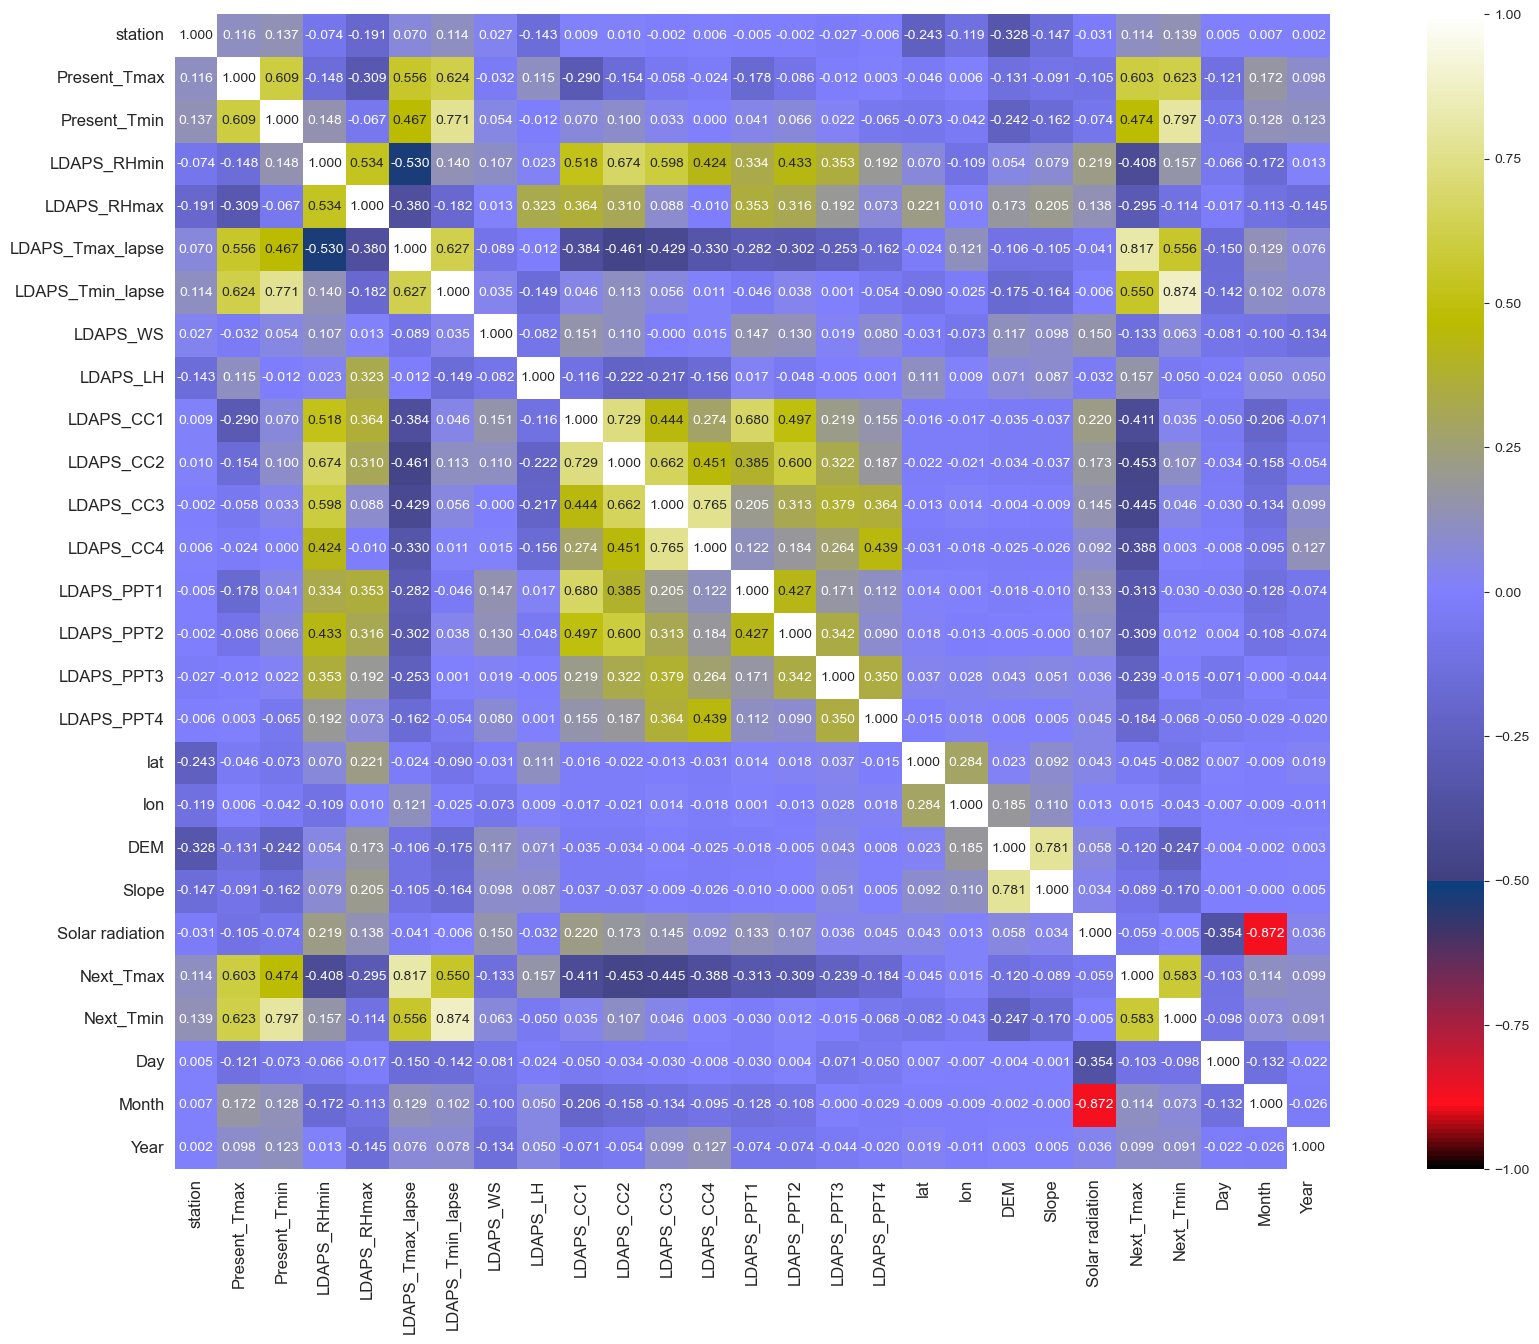

In [42]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

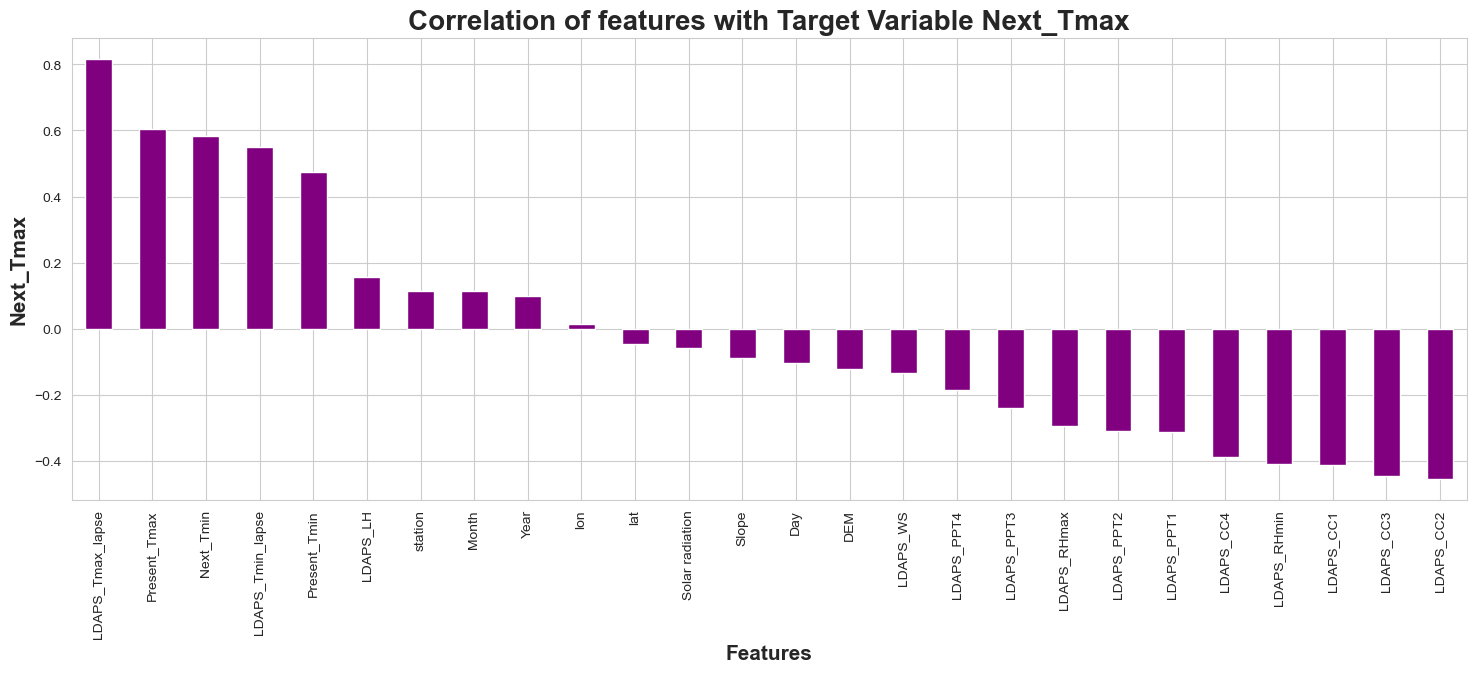

In [43]:
plt.figure(figsize = (18,6))
df.corr()['Next_Tmax'].drop(['Next_Tmax']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Next_Tmax',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Next_Tmax',fontsize = 20,fontweight='bold')
plt.show()

Temperature and cloud cover related feature are moderately or highly correlated with Target Feature.

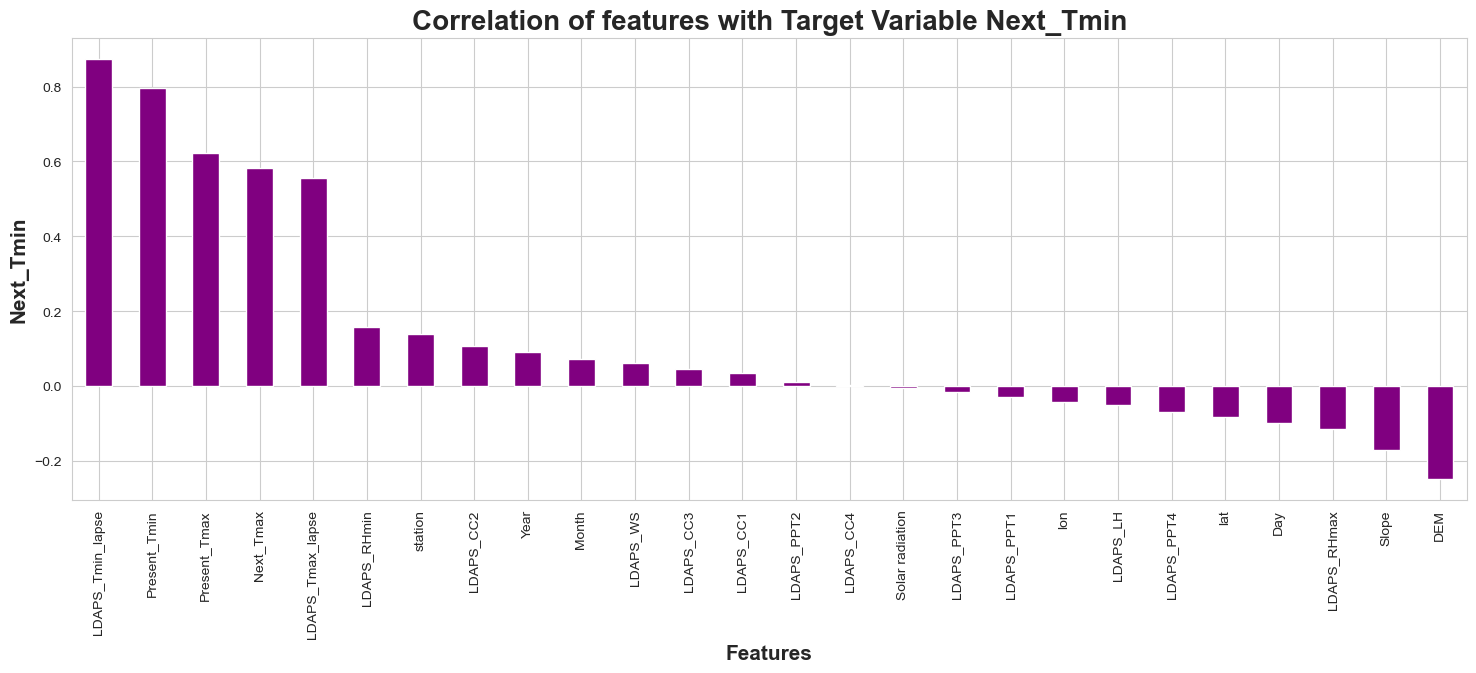

In [44]:
plt.figure(figsize = (18,6))
df.corr()['Next_Tmin'].drop(['Next_Tmin']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Next_Tmin',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Next_Tmin',fontsize = 20,fontweight='bold')
plt.show()

Temperature related feature are moderately or highly correlated with Target Feature.

# Machine Learning Model Building For Next_Tmax

### Standard Scaling

In [45]:
# Splitting data in target and dependent feature
X = df.drop(['Next_Tmax'], axis =1)
Y = df['Next_Tmax']

In [50]:
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

### Checking Multicollinearity between features using variance_inflation_factor

In [51]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

VIF values          Features
0     1.314858           station
1     2.873581      Present_Tmax
2     3.422784      Present_Tmin
3     5.517581       LDAPS_RHmin
4     2.460404       LDAPS_RHmax
5     6.659146  LDAPS_Tmax_lapse
6     8.441212  LDAPS_Tmin_lapse
7     1.209781          LDAPS_WS
8     1.538015          LDAPS_LH
9     4.210815         LDAPS_CC1
10    4.762568         LDAPS_CC2
11    4.205187         LDAPS_CC3
12    2.738755         LDAPS_CC4
13    2.216483        LDAPS_PPT1
14    1.880803        LDAPS_PPT2
15    1.415351        LDAPS_PPT3
16    1.433580        LDAPS_PPT4
17    1.587236               lat
18    1.298603               lon
19    4.638892               DEM
20    3.097997             Slope
21  125.212877   Solar radiation
22    5.830060         Next_Tmin
23   28.930971               Day
24  109.996243             Month
25    1.139253              Year

Independent feature VIF is within permissible limit of 10

### PCA

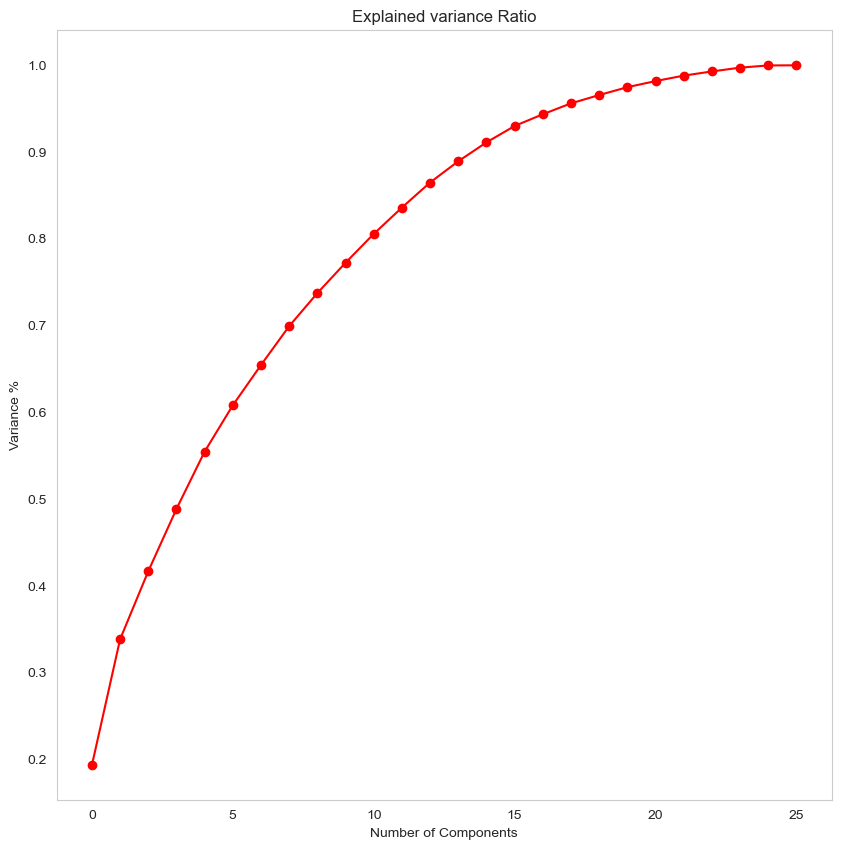

In [52]:
# plot the graph to find the principal components
pca = PCA()
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

As per the graph, we can see that 15 principal components attribute for 90% of variation in the data. We shall pick the first 15 components for our prediction.

In [53]:
pca_new = PCA(n_components=15)
x_new = pca_new.fit_transform(X_scale)

In [54]:
principle_x=pd.DataFrame(x_new,columns=np.arange(15))

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (4018, 15)
Training target vector size: (4018,)
Test feature matrix size: (1980, 15)
Test target vector size: (1980,)


## Finding best Random state

In [56]:
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.8141940741097617 on Random_state 306


## Linear Regression Base Model

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=108, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [28.28921024 31.16393094 30.11830765 ... 30.97865649 33.28736073
 31.92964162]


Actual Wins:
 3108    27.9
6866    27.9
3063    29.7
2047    32.7
3574    29.2
        ... 
7191    30.6
449     28.5
2546    32.0
5170    31.6
7598    32.4
Name: Next_Tmax, Length: 1980, dtype: float64


In [58]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 0.9782475703655412
Mean squared error : 1.6393661001961597
Root Mean Squared Error: 1.2803773272735501


 R2 Score :
0.8020224683680466


In [61]:
# Cross Validation
score = cross_val_score(lin_reg, X_scale, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.6301123724370578


# Applying other ML Models

In [65]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
BR = BaggingRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('============================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 0.7170994949494952
Mean squared error : 0.9095595489898993
Root Mean Squared Error: 0.9537083144179352


 R2 Score :
0.890157327054801


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.619666161616162
Mean squared error : 0.6943370732323237
Root Mean Squared Error: 0.8332689081156958


 R2 Score :
0.9161486016682655


 Error of  DecisionTreeRegressor() :
Mean absolute error : 1.0138383838383838
Mean squared error : 1.9882222222222221
Root Mean Squared Error: 1.4100433405474535


 R2 Score :
0.7598929684807723


 Error of  AdaBoostRegressor() :
Mean absolute error : 1.0652141247718288
Mean squared error : 1.7787896629174313
Root Mean Squared Error: 1.3337127362807297


 R2 Score :
0.7851850256543127


 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.8124589205186078
Mean squared error : 1.1195160229855878
Root Mean Squared Error: 1.0580718420719775


 R2 Score :
0.8648019994883465


 Error of  XGBReg

In [66]:
# Cross Validation
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('=============================================================================')



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.6916771438898891


Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.6916383534485968


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.42667721931364494


Cross Validation Score : AdaBoostRegressor() :

Mean CV Score : 0.6500591356948647


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.7031302008212608


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, ma

# Final Regression Model

In [68]:
Final_mod =  XGBRegressor(n_estimators=100 , booster= 'dart', eta= 0.1, max_depth= 10, gamma= 0.0 )
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.671262746290727
Mean squared error : 0.8177850073886741
Root Mean Squared Error: 0.9043146617127659


 R2 Score of Final Model :
0.9012404507150319




## Final Regression Saving Model

In [71]:
import joblib
joblib.dump(Final_mod,'Next_Tmax_Forecast_Final.pkl')

['Next_Tmax_Forecast_Final.pkl']

## Prediction According Final Regression Model

In [72]:
# Loading the saved model
Model = joblib.load("Next_Tmax_Forecast_Final.pkl")

# prediction  DataFrame
actual = np.array(Y_test)
predicted = np.array(Model.predict(X_test))
df_Predicted = pd.DataFrame({"Actual Values":actual,"Predicted Values":predicted},index= range(len(actual)))
df_Predicted 

Actual Values  Predicted Values
0              27.9         27.620886
1              27.9         29.002985
2              29.7         30.203537
3              32.7         31.508821
4              29.2         29.516571
...             ...               ...
1975           30.6         31.597017
1976           28.5         28.878689
1977           32.0         31.293501
1978           31.6         33.117466
1979           32.4         32.287418

[1980 rows x 2 columns]

# Machine Learning Model Building For Next_Tmin

## Standard Scaling

In [73]:
# Splitting data in target and dependent feature
X = df.drop(['Next_Tmin'], axis =1)
Y = df['Next_Tmin']

In [74]:
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (4018, 26)
Training target vector size: (4018,)
Test feature matrix size: (1980, 26)
Test target vector size: (1980,)


## Finding best Random state

In [76]:
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.8604925857931062 on Random_state 72


## Linear Regression Base Model

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=43, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [21.56184585 22.0024207  23.45300575 ... 20.9593141  24.448602
 24.35439707]


Actual Wins:
 3548    23.3
2937    23.5
4932    21.7
391     24.2
6423    23.8
        ... 
6072    20.8
2457    22.5
5112    21.1
2054    23.8
6835    23.6
Name: Next_Tmin, Length: 1980, dtype: float64


## Linear Regression Evaluation Matrix

In [78]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 0.7390256628050341
Mean squared error : 0.8659587239884708
Root Mean Squared Error: 0.930569032360561


 R2 Score :
0.8422174860424907


In [79]:
# Cross Validation
score = cross_val_score(lin_reg, X_scale, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.7948125575422319


## Applying other ML Models

In [80]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
BR = BaggingRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 0.5820070707070708
Mean squared error : 0.5648872767676767
Root Mean Squared Error: 0.751589832799564


 R2 Score :
0.897074384538215


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.5376580808080809
Mean squared error : 0.49392847525252526
Root Mean Squared Error: 0.7028004519438823


 R2 Score :
0.9100034743208147


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.8456060606060607
Mean squared error : 1.251429292929293
Root Mean Squared Error: 1.1186730053636285


 R2 Score :
0.7719825963886461


 Error of  AdaBoostRegressor() :
Mean absolute error : 0.8399205303494106
Mean squared error : 1.0639588739031072
Root Mean Squared Error: 1.0314838214451583


 R2 Score :
0.8061407533391072


 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.6082396709962231
Mean squared error : 0.6006312687872843
Root Mean Squared Error: 0.7750040443683403


 R2 Score :
0.8905616296418212


 Error of  XGBReg

In [81]:
# Cross Validation
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('===============================================================================')



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.8055823395229365


Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.808831979294592


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.6102927870468992


Cross Validation Score : AdaBoostRegressor() :

Mean CV Score : 0.7603091179284434


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.8111295068237323


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_

# Final Regression Model For Next_Tmin

In [86]:
Final_mod =  XGBRegressor(n_estimators=100 , booster= 'dart', eta= 0.1, max_depth= 8, gamma= 0.0 )
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.48481089062160915
Mean squared error : 0.4061004302365823
Root Mean Squared Error: 0.6372600962217722


 R2 Score of Final Model :
0.9260062344463347




# Saving Final Regression Model For Next_Tmin

In [88]:
joblib.dump(Final_mod,'Next_Tmin_Forecast_Final.pkl')

['Next_Tmin_Forecast_Final.pkl']

# Prediction According Final Regression Model For Next_Tmin

In [89]:
# Loading the saved model
Model = joblib.load("Next_Tmin_Forecast_Final.pkl")

# prediction  DataFrame
actual = np.array(Y_test)
predicted = np.array(Model.predict(X_test))
df_Predicted = pd.DataFrame({"Actual Values":actual,"Predicted Values":predicted},index= range(len(actual)))
df_Predicted 

Actual Values  Predicted Values
0              23.3         22.766626
1              23.5         23.468912
2              21.7         22.429518
3              24.2         23.338594
4              23.8         23.795893
...             ...               ...
1975           20.8         21.785940
1976           22.5         22.556856
1977           21.1         20.277433
1978           23.8         23.772772
1979           23.6         24.157665

[1980 rows x 2 columns]